# Temperature Forecast Project

Problem Statement: Depending upon various features or predictors, we have to predict the minimum and the maximum temperature for the next day.

In [68]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [69]:
#Importing the dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [70]:
df.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   
5         29.219342         23.822613  6.182295   50.231389  ...         0.0   
6         28.551859         24.238467  5.587135  125.110007  ...         0.0   
7         28.851982         23.819054  6.104417   42.011547  ...         0.0   
8         28.426975         23.332373  6.017135   85.110971  ...         0.0   
9         27.576705         22.527018  6.518841   63.006075  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   
5         0.0         0.0  37.5102  127.042   54.6384  0.1457   
6         0.0         0.0  37.5776  126.838   12.3700  0.0985   
7         0.0         0.0  37.4697  126.910   52.5180  1.5629   
8         0.0         0.0  37.4967  126.826   50.9312  0.4125   
9         0.0         0.0  37.4562  126.955  208.5070  5.1782   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  
5      5873.780762       31.5       24.0  
6      5849.233398       30.9       23.4  
7      5863.992188       31.1       22.9  
8      5876.901367       31.3       21.6  
9      5893.608398       30.5       21.0  

[10 rows x 25 columns]

In [71]:
df.tail(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7742  ...    0.000000    0.000000    0.000000  37.4832  127.024   56.4448   
7743  ...    0.000000    0.000000    0.000000  37.5776  126.938   75.0924   
7744  ...    0.000000    0.000000    0.000000  37.6181  127.004  146.5540   
7745  ...    0.000000    0.000000    0.000000  37.5507  127.040   26.2980   
7746  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7742  1.231300      4435.611816       27.8       16.7  
7743  1.767800      4495.473633       27.1       16.6  
7744  4.729600      4554.965332       26.7       16.3  
7745  0.572100      4456.024414       27.6       17.7  
7746  0.133200      4441.803711       28.0       17.1  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[10 rows x 25 columns]

# Exploratory Data Analysis (EDA)

In [72]:
#Checking the shape of the dataset

df.shape

(7752, 25)

The dataset consists of 7752 rows and 25 columns, of which Next_Tmax & Next_Tmin are the target variables.

In [73]:
#Checking the columns of the dataset

df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [74]:
#Checking the Info (RangeIndex, datatypes, columns and memory usage of the dataset)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


From the above method, we can conclude that most of the columns consist of null values, and we can either remove them later or impute the values.

In [75]:
#Checking the null values present in the dataset

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

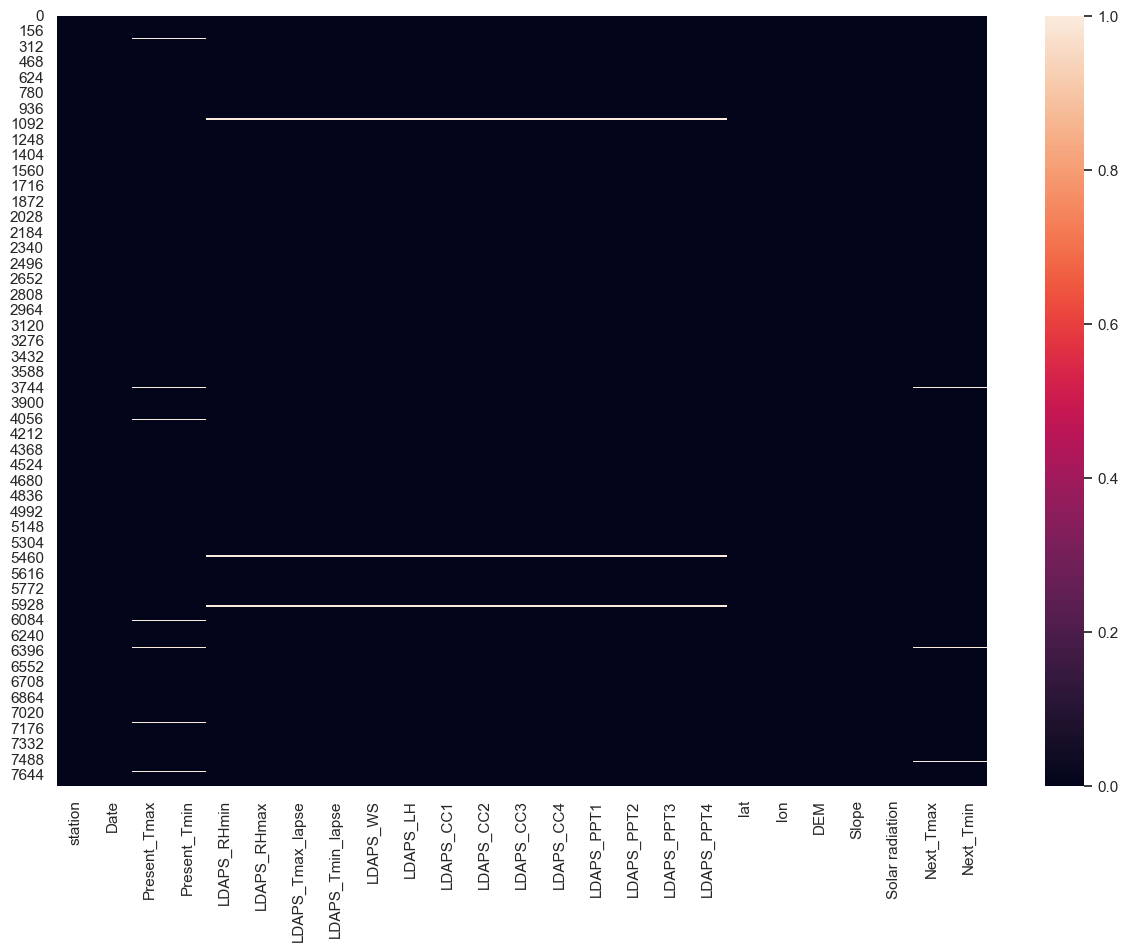

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [77]:
#Checking the number of unique values in the dataset

df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [78]:
#Checking the value counts of each column in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)
    print('\n')

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64
**************************************************


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64
**************************************************


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
**************************************************


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29

We can see that the last two values of the station and date columns have null values, so we can impute them.

In [79]:
#Imputing the last two values as 1.0 and 2.0 for the station column

df['station'].iloc[7750]=1.0
df['station'].iloc[7751]=2.0

In [80]:
#Imputing the last two dates as 31-08-2017 for the Date column

df['Date'].iloc[7750]='31-08-2017'
df['Date'].iloc[7751]='31-08-2017'

In [81]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [82]:
#Now we will check the skewness of the columns and impute the values on the basis of distribution of the data

In [83]:
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

We can see the skewness present in LDAPS_Rhmax, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, slope, and solar radiation. For these columns, we will replace null values with medians. For all other columns where there is no skewness, we will replace null values with the mean.

In [84]:
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median(), inplace=True)
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median(), inplace=True)
df['LDAPS_WS'].fillna(df['LDAPS_WS'].median(), inplace=True)
df['LDAPS_LH'].fillna(df['LDAPS_LH'].median(), inplace=True)
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median(), inplace=True)
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median(), inplace=True)
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median(), inplace=True)
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median(), inplace=True)
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median(), inplace=True)
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median(), inplace=True)
df['DEM'].fillna(df['DEM'].median(), inplace=True)
df['Slope'].fillna(df['Slope'].median(), inplace=True)
df['DEM'].fillna(df['DEM'].median(), inplace=True)
df['Solar radiation'].fillna(df['Solar radiation'].median(), inplace=True)

In [85]:
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(), inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(), inplace=True)
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(), inplace=True)
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(), inplace=True)
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(), inplace=True)
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(), inplace=True)
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(), inplace=True)
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(), inplace=True)

In [86]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now, we have imputed all the null values.

In [87]:
df.describe().T

count         mean         std          min          25%  \
station           7752.0    12.997033    7.213007     1.000000     7.000000   
Present_Tmax      7752.0    29.768211    2.956557    20.000000    27.800000   
Present_Tmin      7752.0    23.225059    2.403036    11.300000    21.700000   
LDAPS_RHmin       7752.0    56.759372   14.596973    19.794666    46.046162   
LDAPS_RHmax       7752.0    88.388529    7.158471    58.936283    84.316923   
LDAPS_Tmax_lapse  7752.0    29.613447    2.932898    17.624954    27.693091   
LDAPS_Tmin_lapse  7752.0    23.514984    2.334099    14.272646    22.114651   
LDAPS_WS          7752.0     7.092549    2.173913     2.882580     5.686487   
LDAPS_LH          7752.0    62.450457   33.571540   -13.603212    37.532764   
LDAPS_CC1         7752.0     0.368774    0.261185     0.000000     0.148321   
LDAPS_CC2         7752.0     0.356080    0.256810     0.000000     0.142328   
LDAPS_CC3         7752.0     0.317864    0.249208     0.000000     0.103100   
LDAPS_CC4         7752.0     0.298499    0.253211     0.000000     0.082741   
LDAPS_PPT1        7752.0     0.586267    1.937198     0.000000     0.000000   
LDAPS_PPT2        7752.0     0.480310    1.754900     0.000000     0.000000   
LDAPS_PPT3        7752.0     0.275508    1.156495     0.000000     0.000000   
LDAPS_PPT4        7752.0     0.266801    1.200654     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7752.0    30.274887    3.122557    17.400000    28.200000   
Next_Tmin         7752.0    22.932220    2.483276    11.300000    21.400000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.313244    67.038254    98.524734  
LDAPS_RHmax         89.793480    93.704500   100.000153  
LDAPS_Tmax_lapse    29.662273    31.683819    38.542255  
LDAPS_Tmin_lapse    23.760199    25.134000    29.619342  
LDAPS_WS             6.547470     8.007471    21.857621  
LDAPS_LH            56.865482    83.904586   213.414006  
LDAPS_CC1            0.320110     0.571696     0.967277  
LDAPS_CC2            0.315667     0.554963     0.968353  
LDAPS_CC3            0.262555     0.494007     0.983789  
LDAPS_CC4            0.227664     0.497230     0.974710  
LDAPS_PPT1           0.000000     0.049122    23.701544  
LDAPS_PPT2           0.000000     0.016748    21.621661  
LDAPS_PPT3           0.000000     0.007231    15.841235  
LDAPS_PPT4           0.000000     0.000000    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

Conclusion: 

The count of every column is 7752, which means there are no null values in the dataset.

We can see that some columns are normally distributed, while others have a mean greater than the median, and vice versa.

There's a huge difference between 75% and the maximum, which indicates the presence of outliers in the dataset.

In [88]:
#Converting the datatype of date column from object to datetime

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)

In [89]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Month                        int64
Day                          int64
Year                         int64
dtype: object

In [90]:
#Dropping the date column from the dataset
df.drop("Date", axis=1,inplace=True)

# Data Visualisation

Univariate Analysis

In [24]:
sns.set()

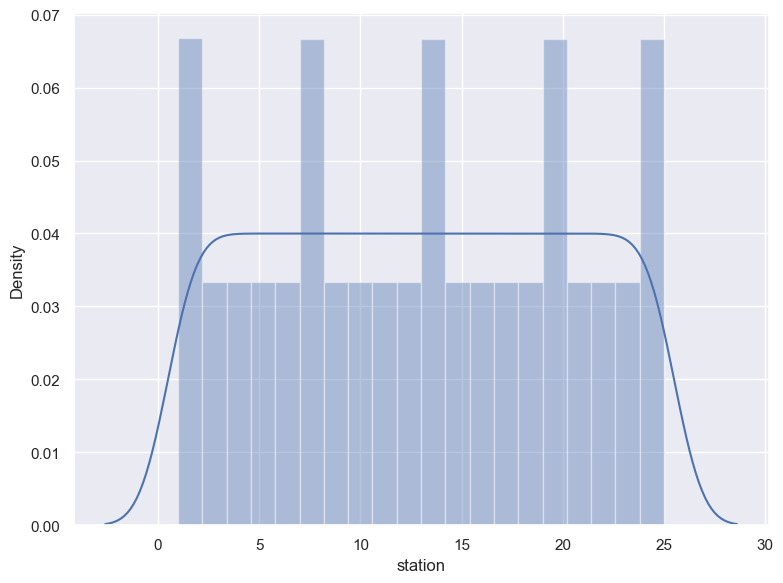

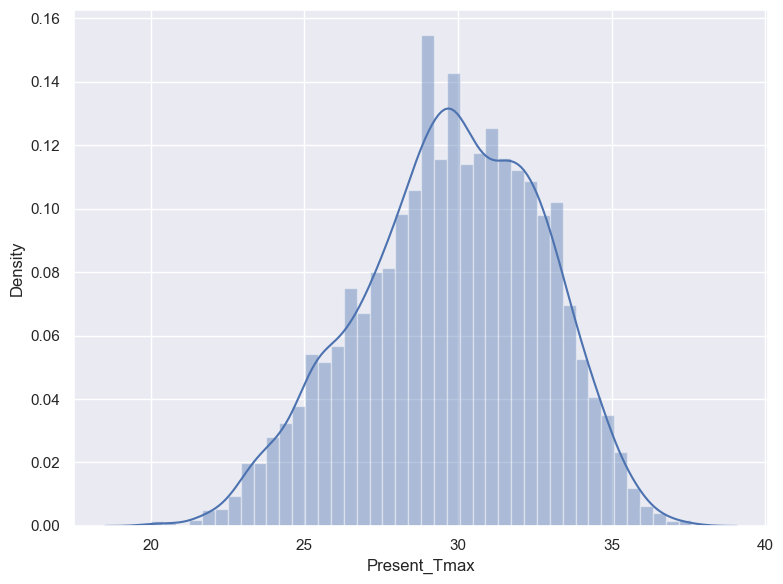

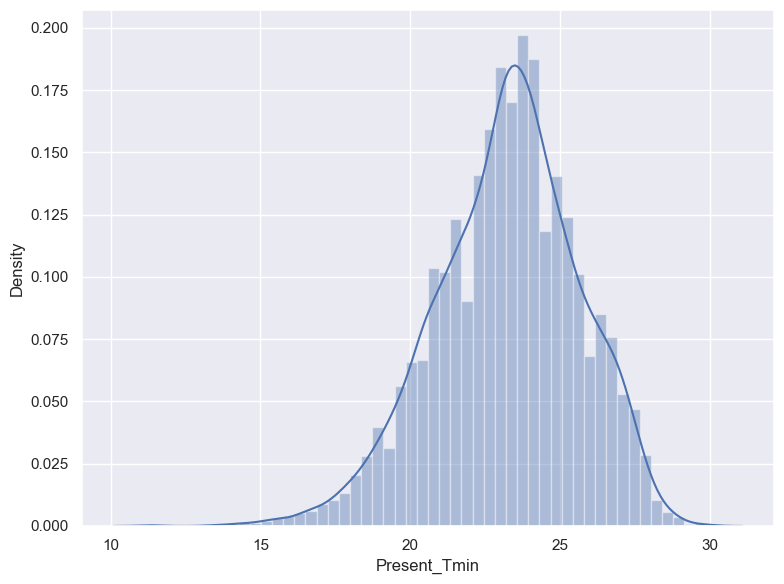

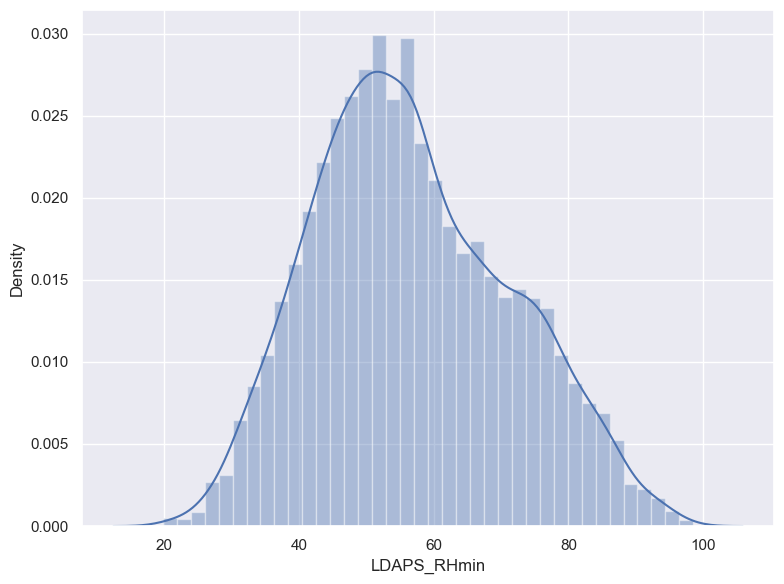

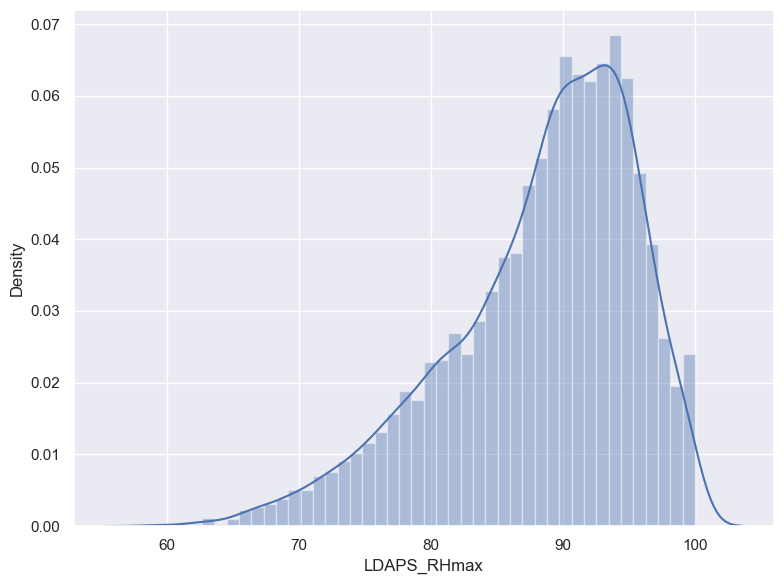

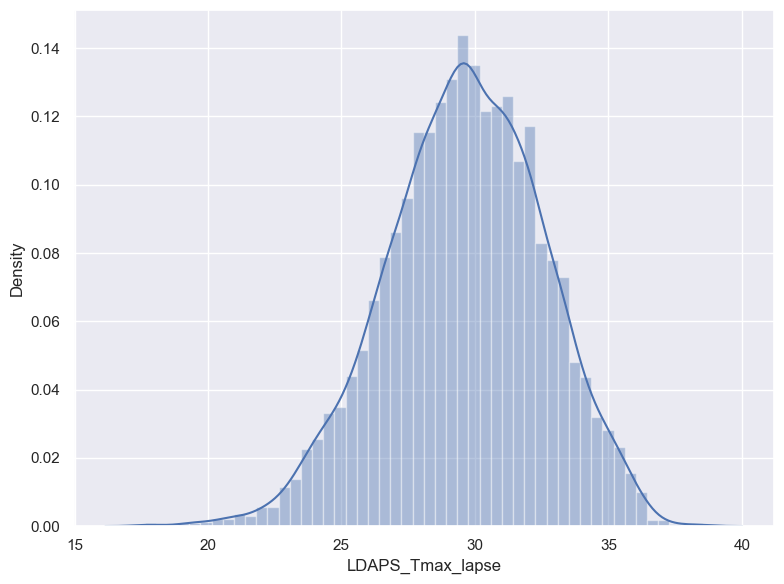

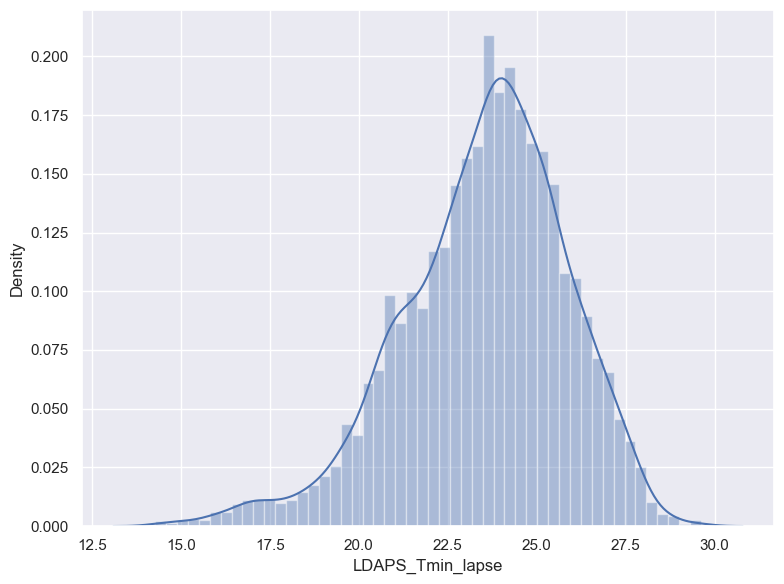

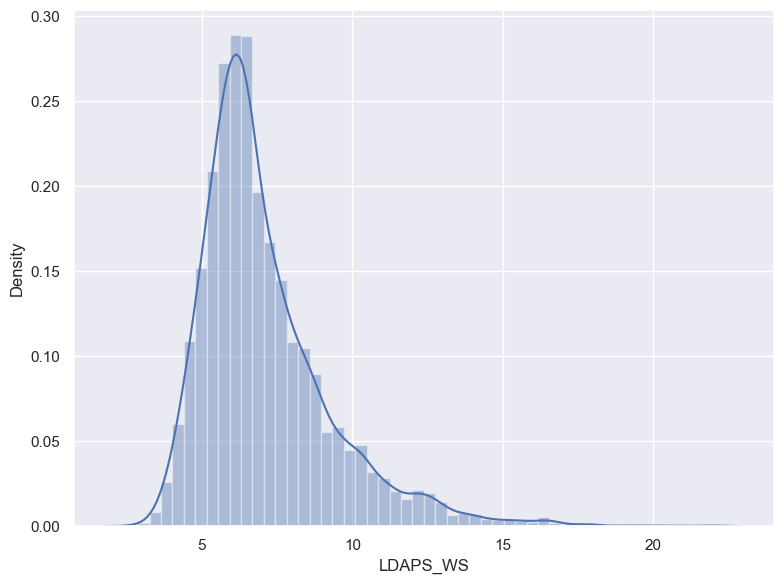

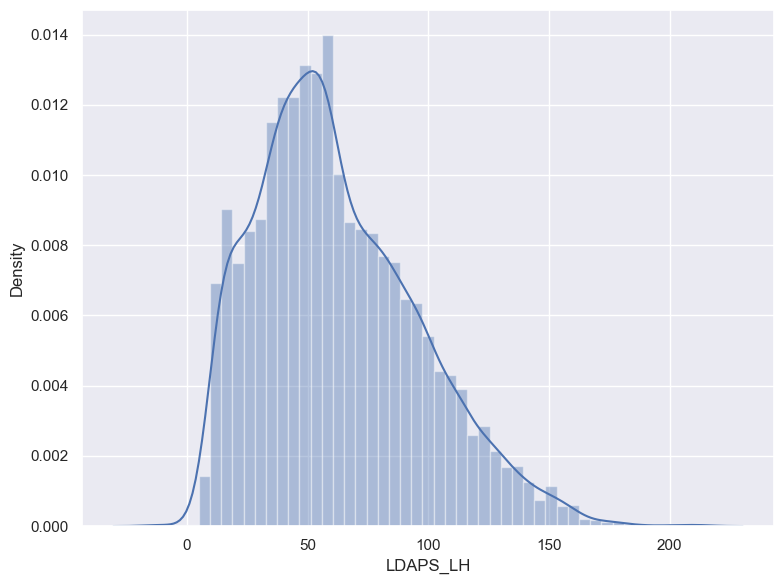

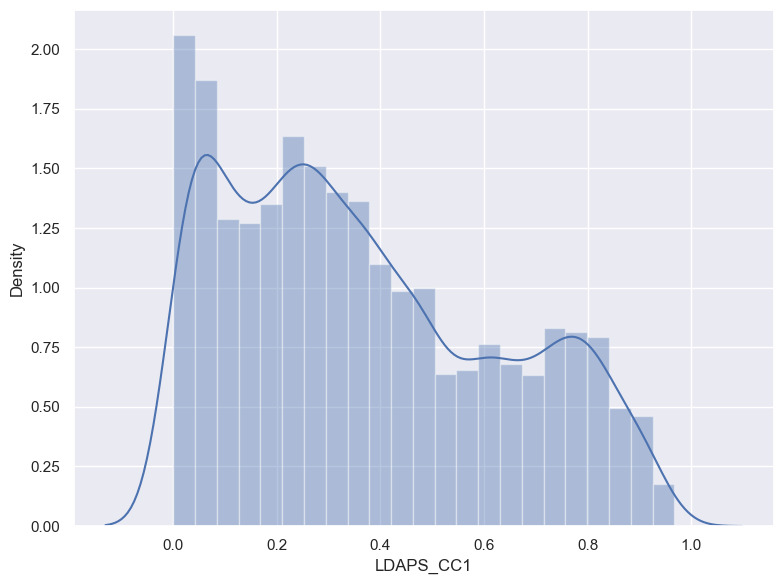

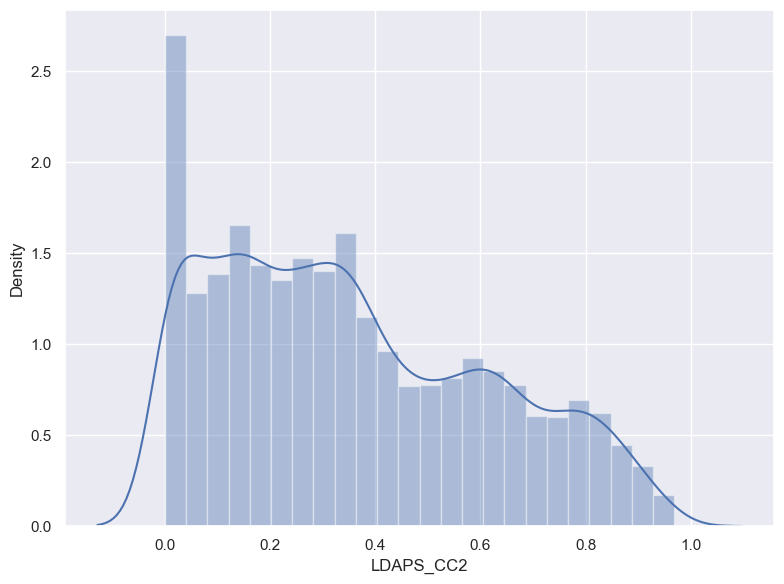

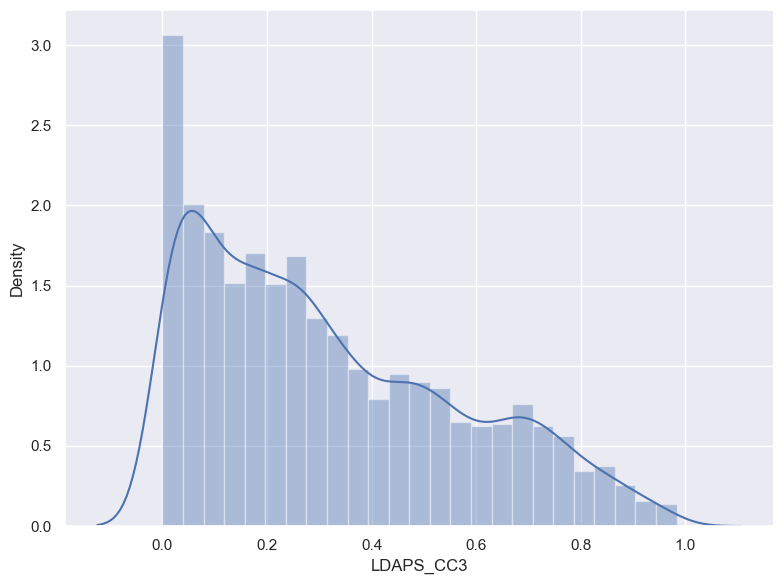

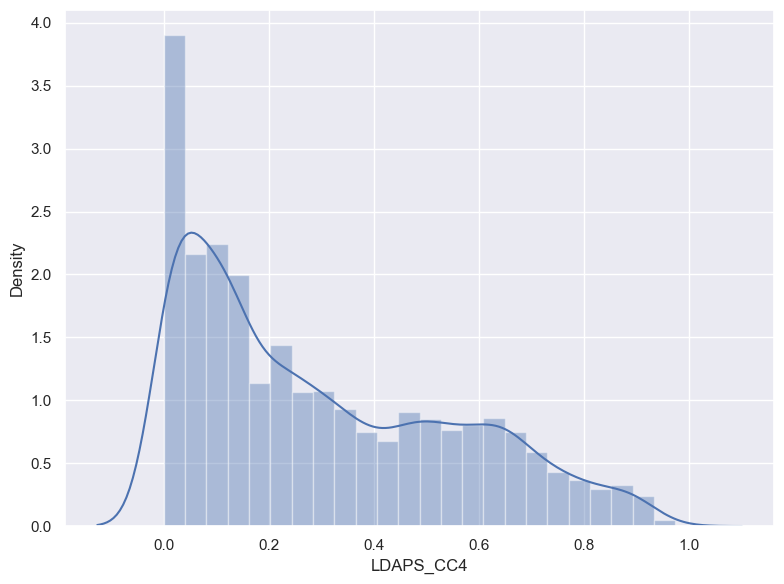

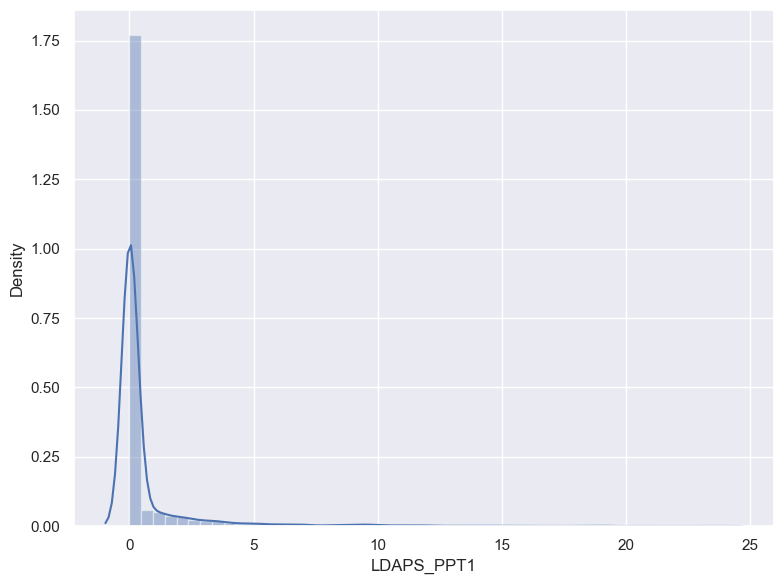

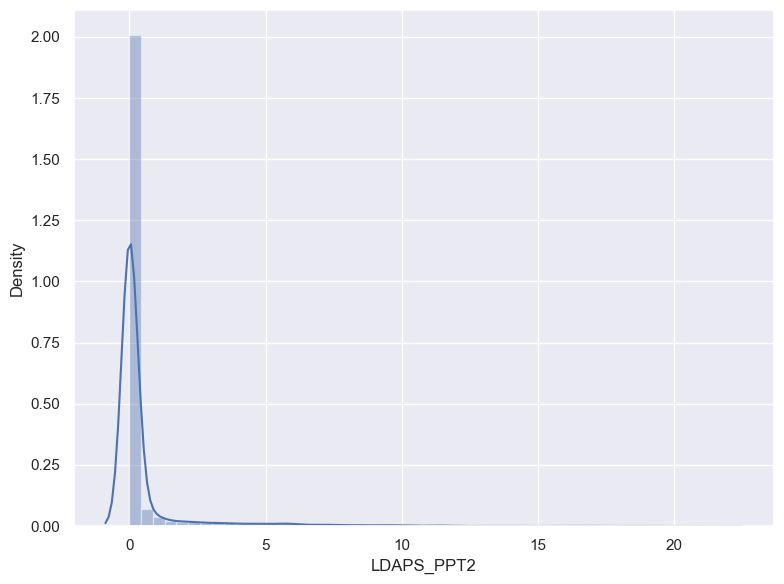

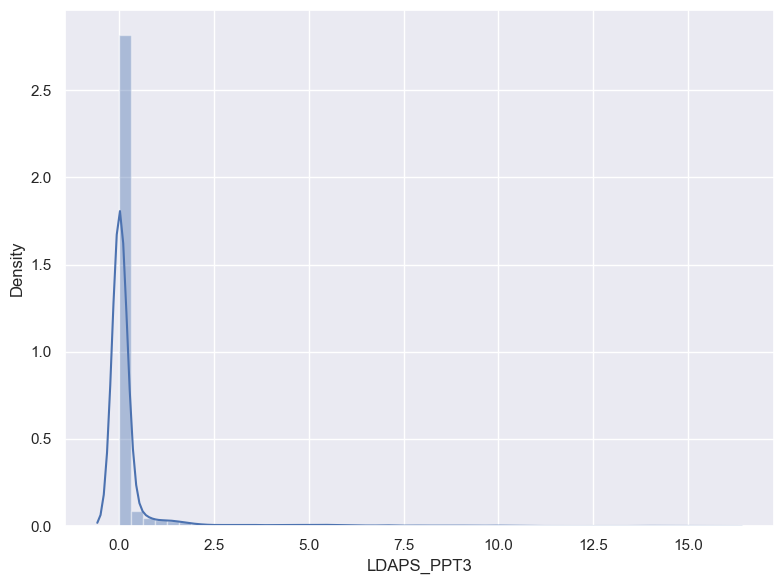

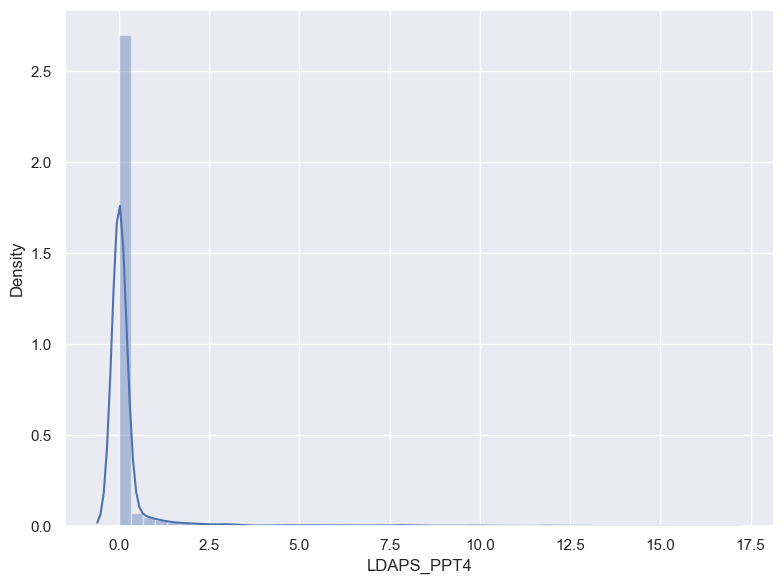

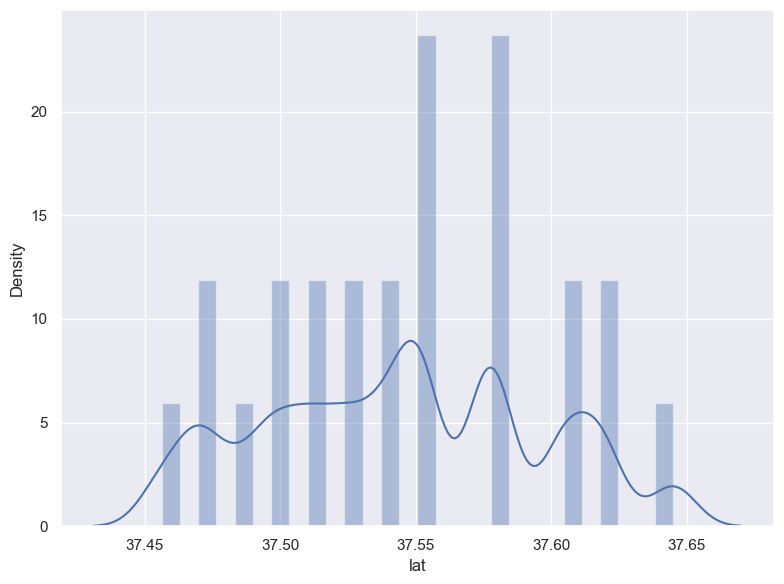

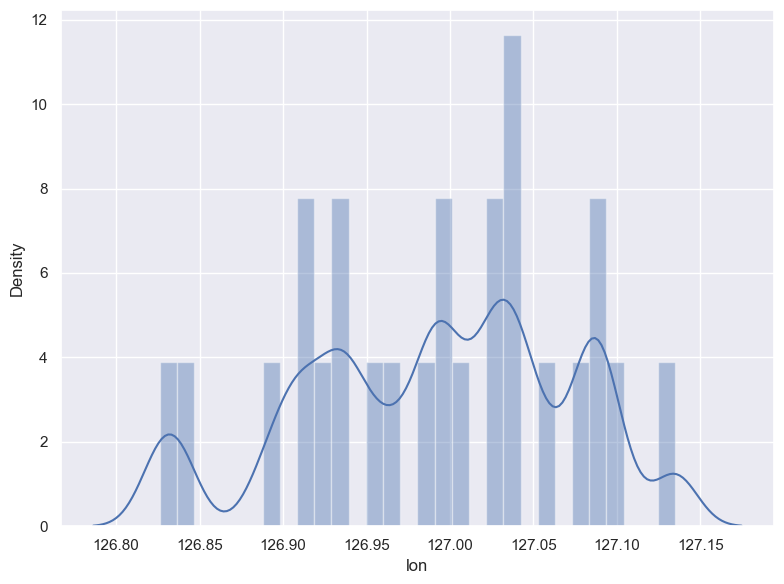

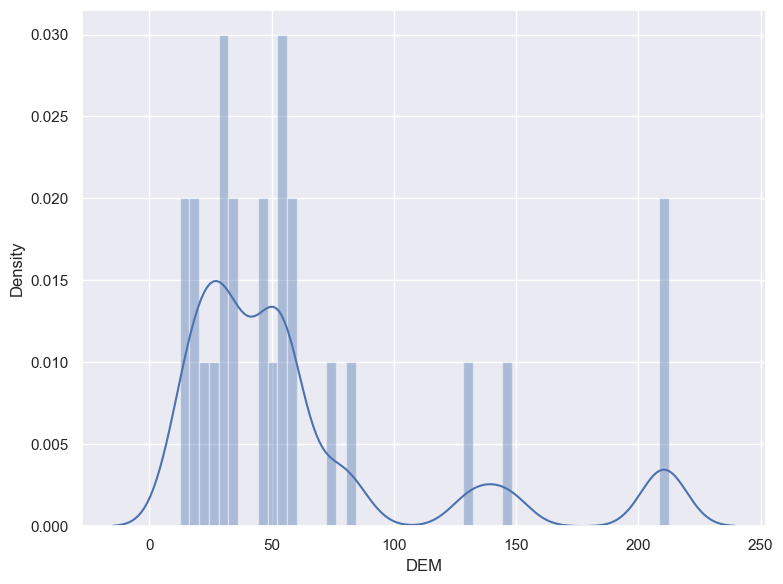

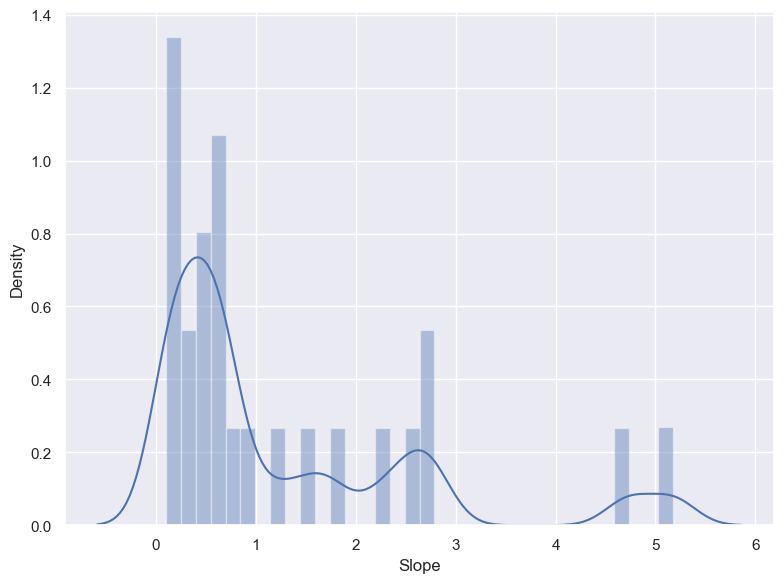

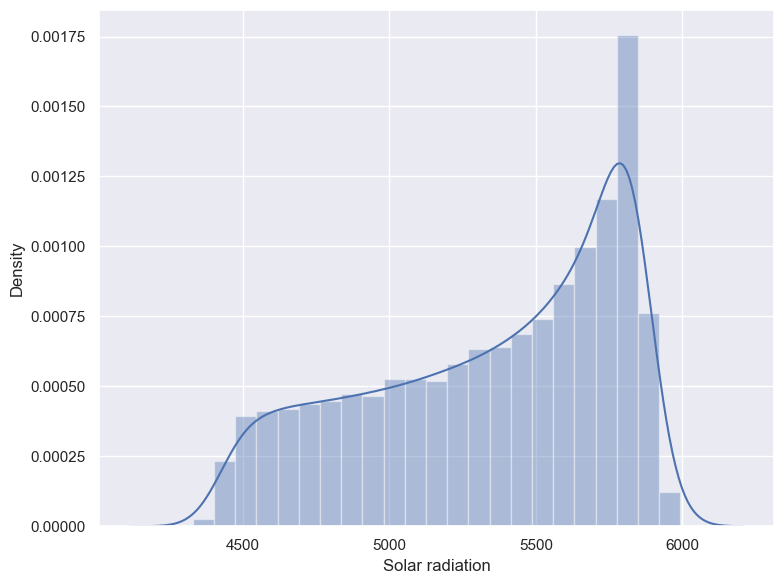

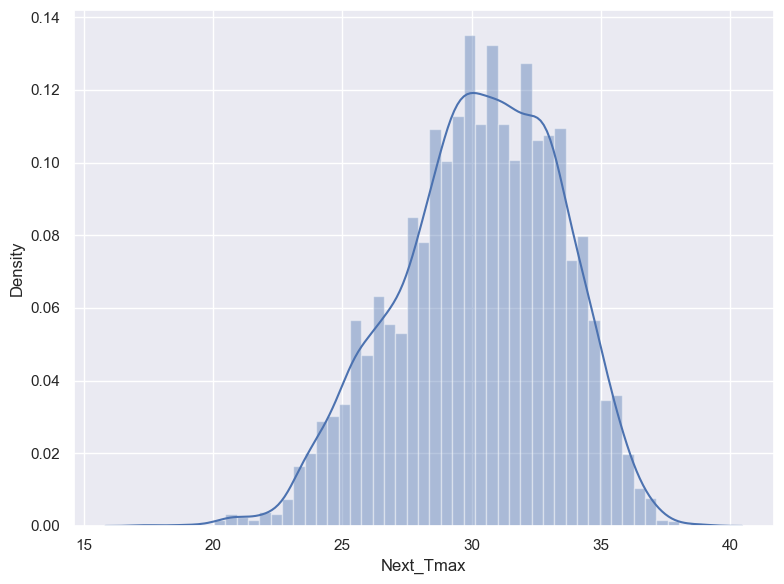

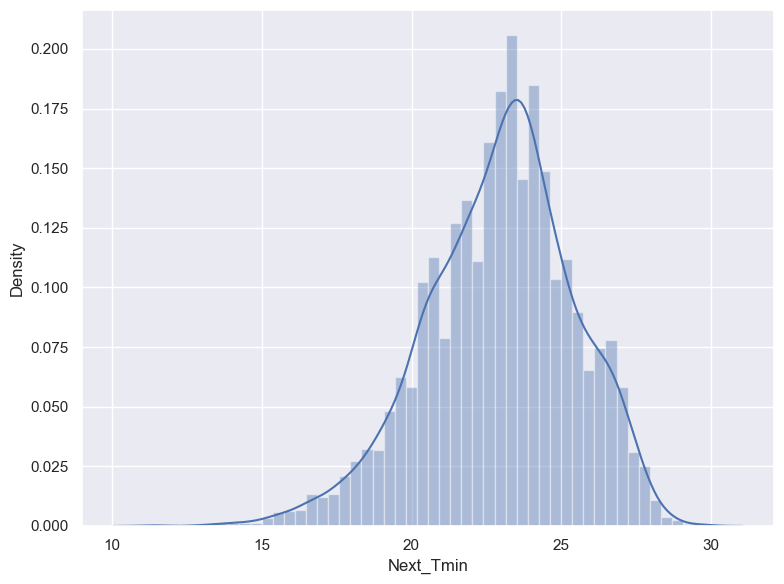

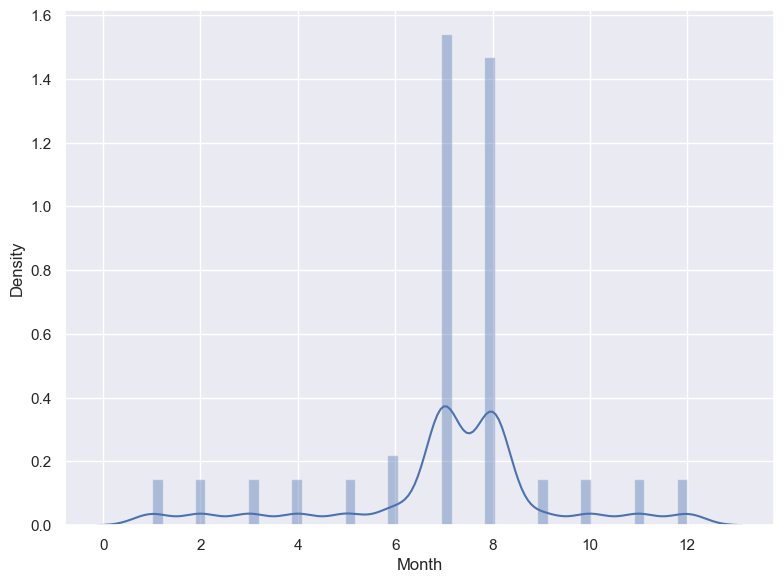

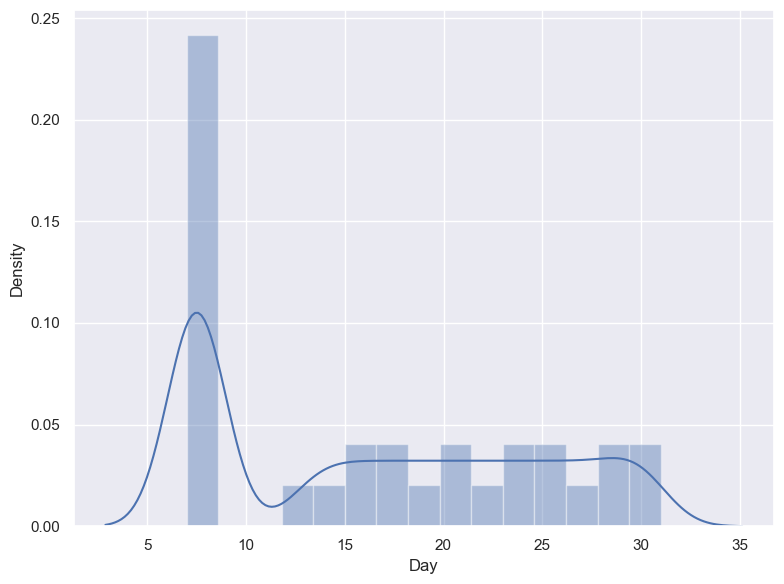

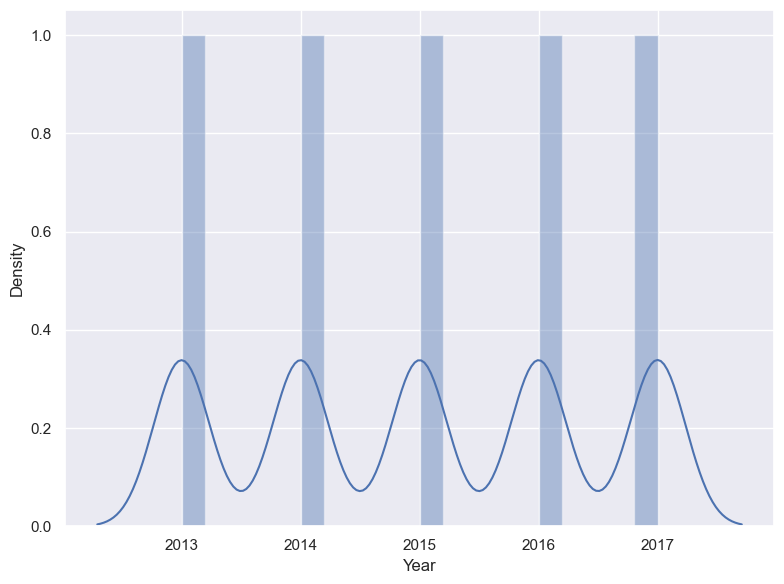

In [25]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    sns.distplot(df[i], kde=True)
    plt.tight_layout()

From the above ditribution plots, we can conclude that the distribution is normal, left and right skewed as well.

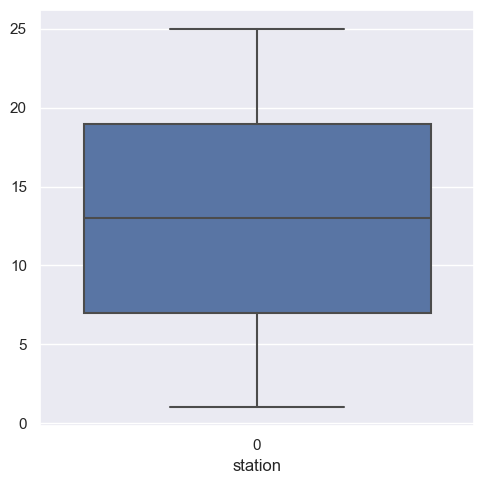

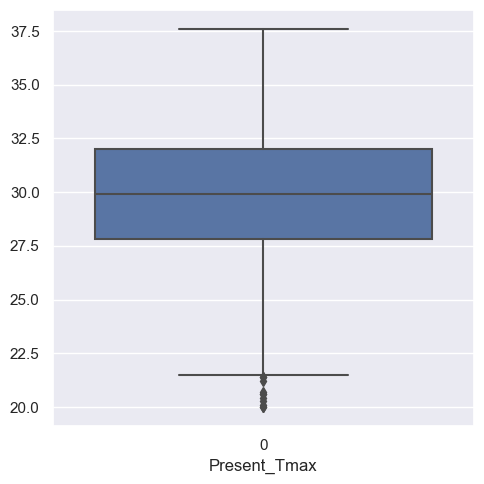

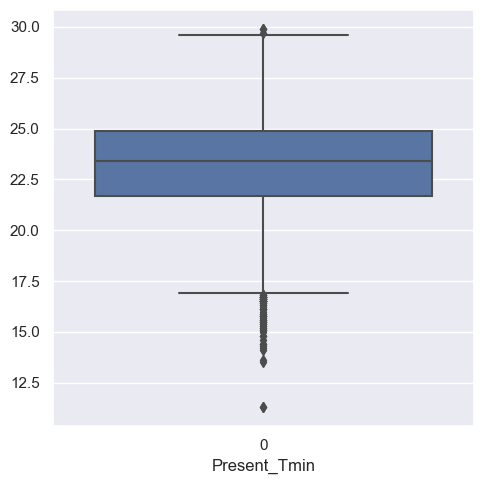

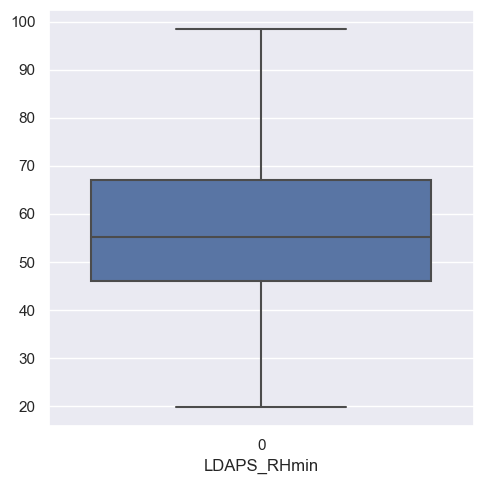

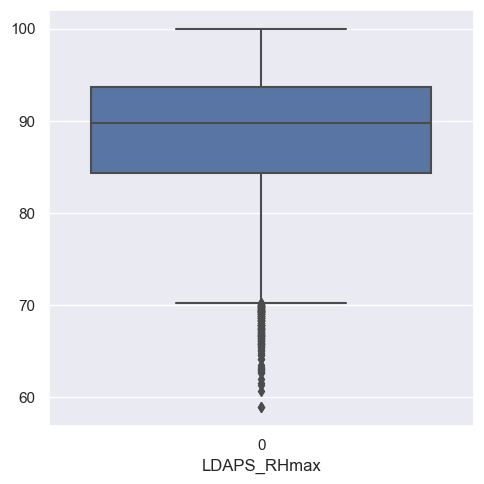

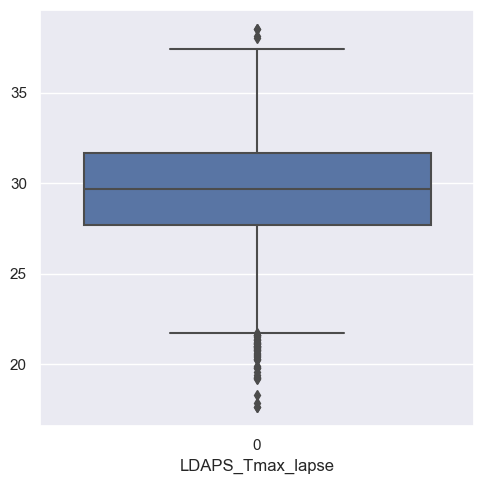

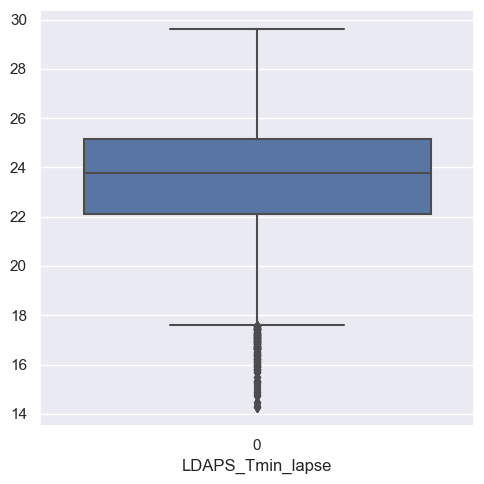

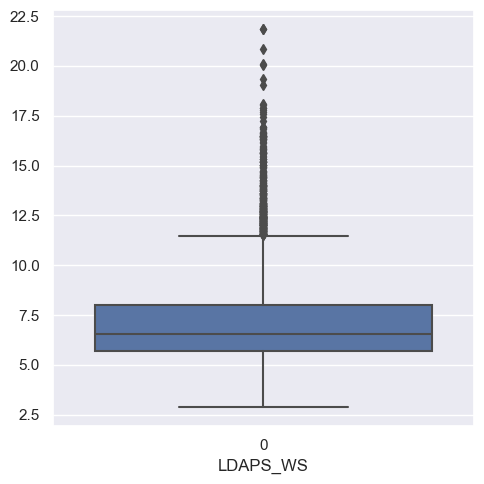

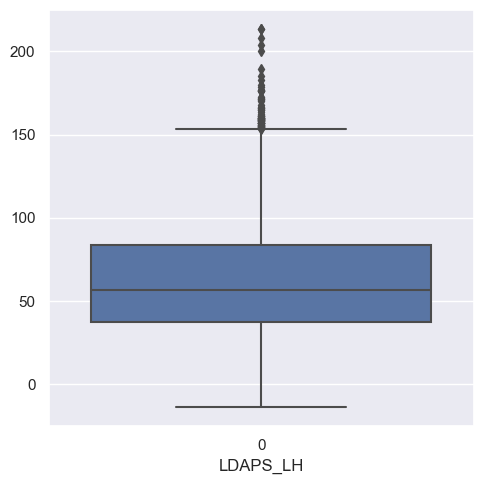

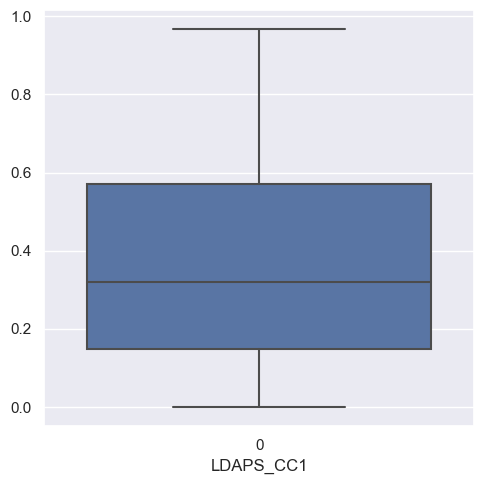

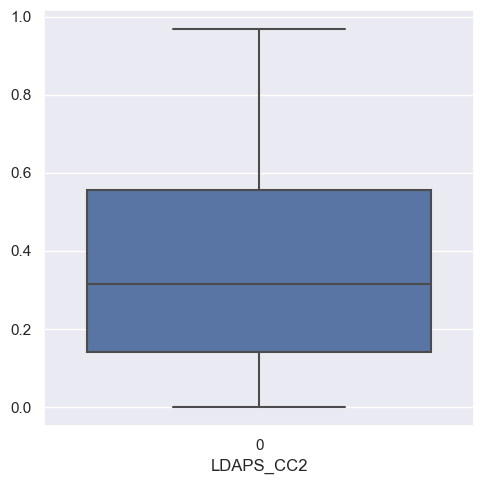

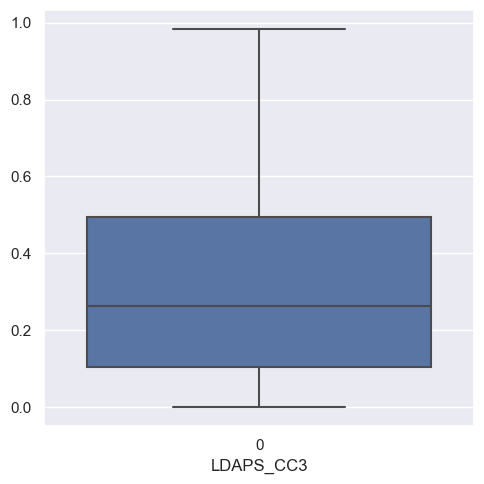

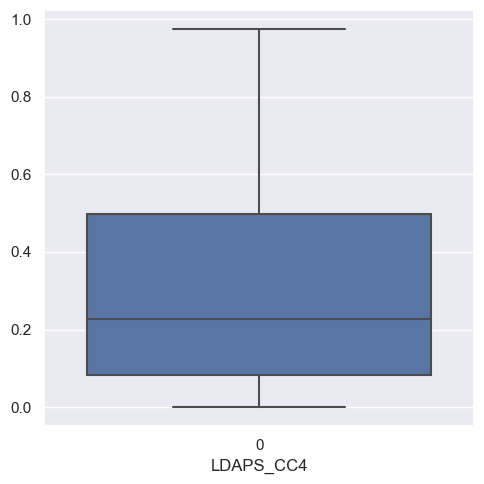

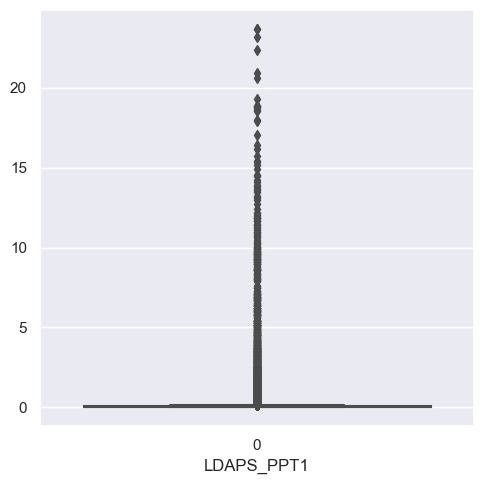

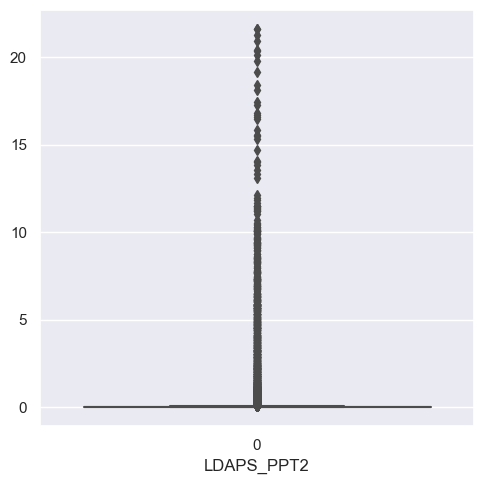

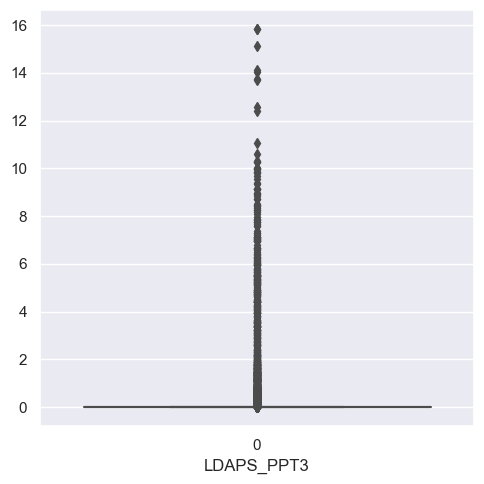

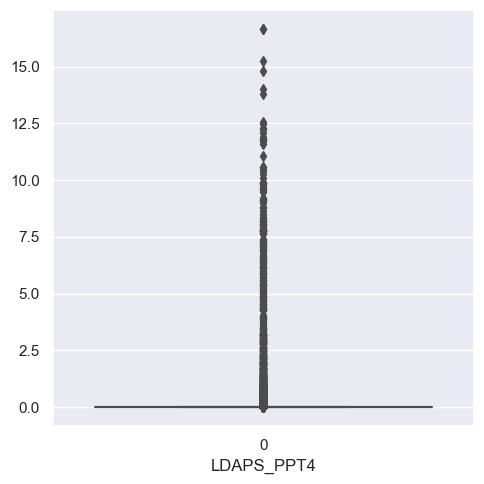

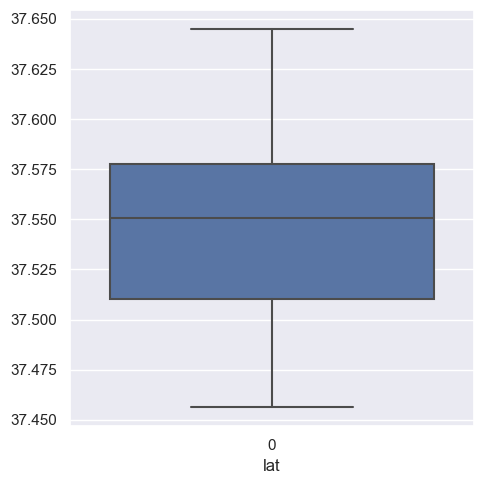

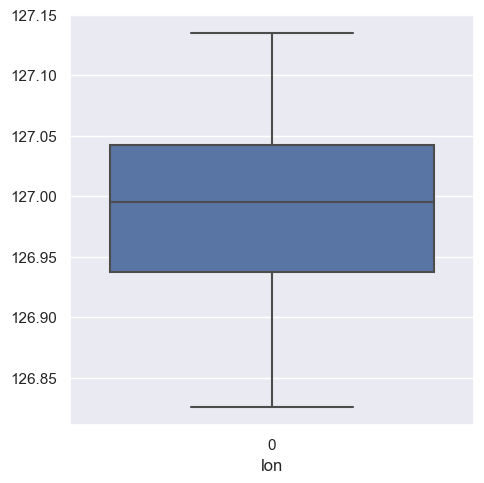

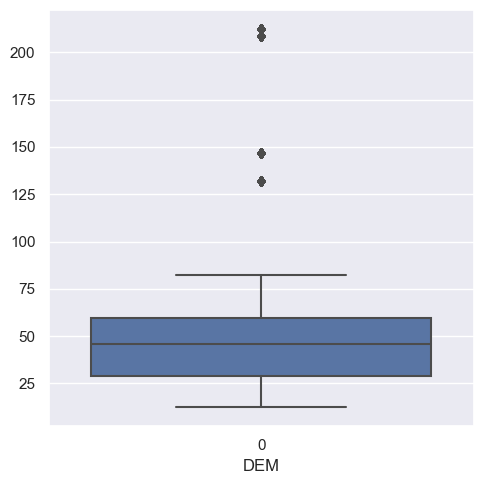

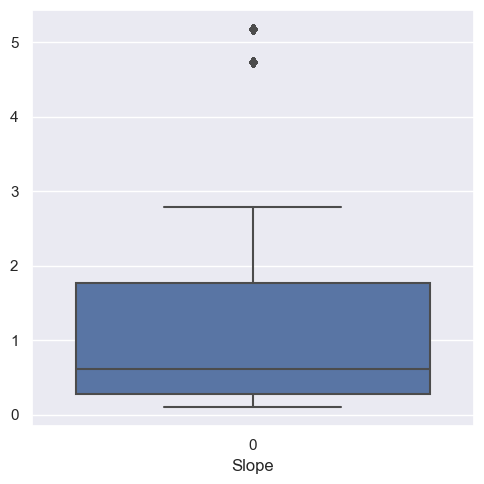

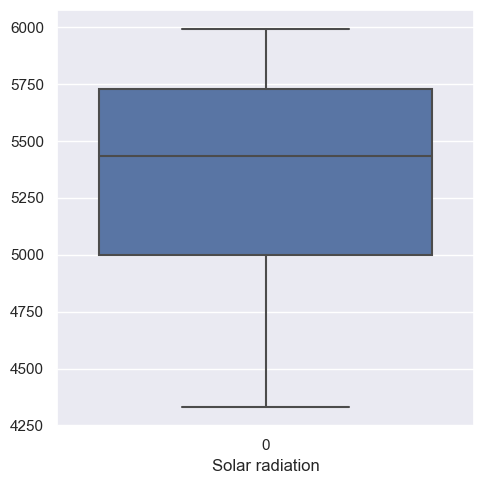

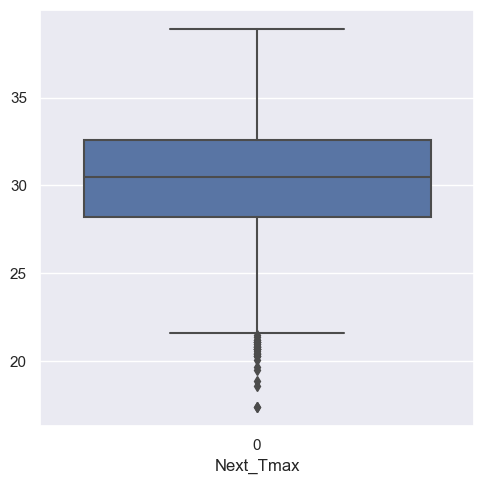

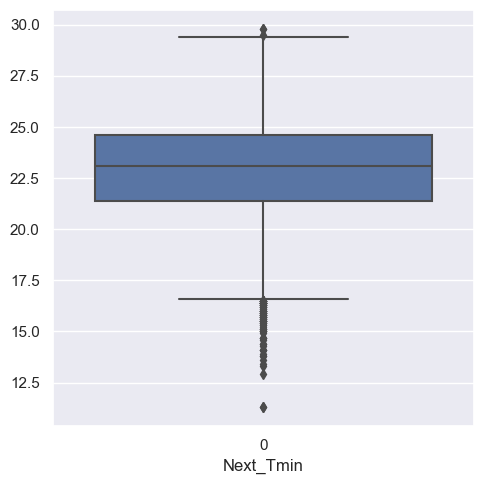

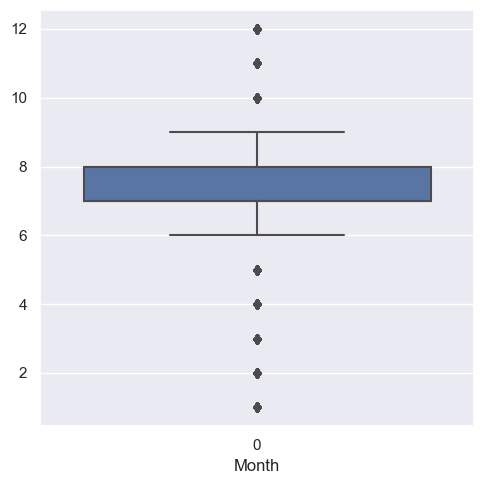

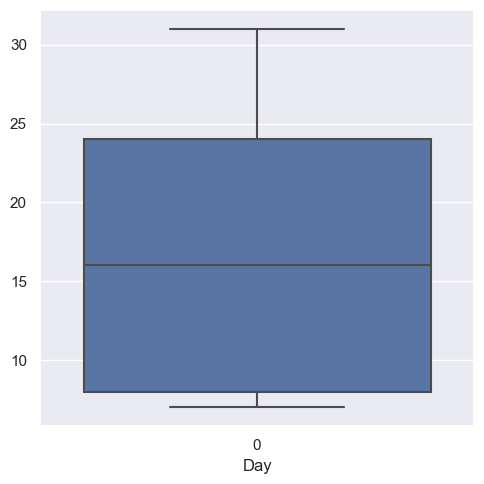

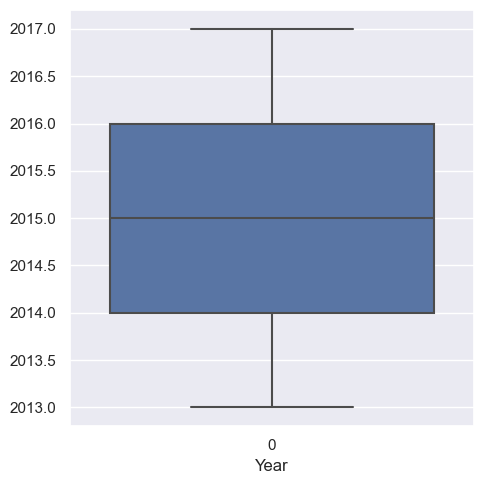

In [26]:
#Checking outliers in the dataset by plotting the box plots

for i in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=12)
    plt.tight_layout()

Bivariate Analysis

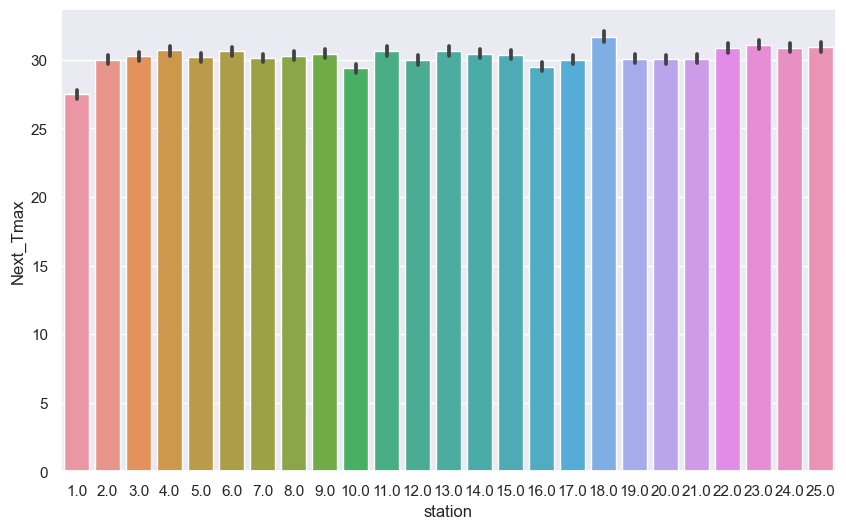

In [27]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'station', y = 'Next_Tmax', data=df)
plt.show()

We can conclude that the maximum temperature is noticed in station 18.

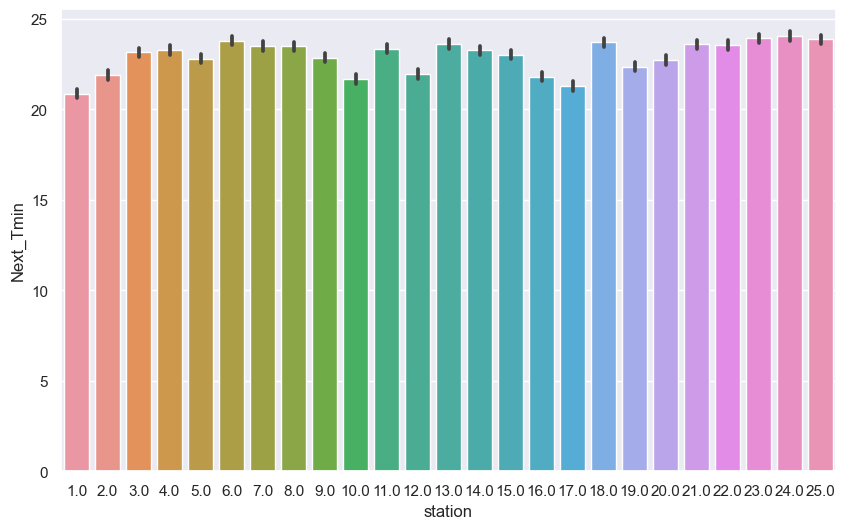

In [28]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'station', y = 'Next_Tmin', data=df)
plt.show()

We can conclude that the minimum temperature is noticed in station 1.

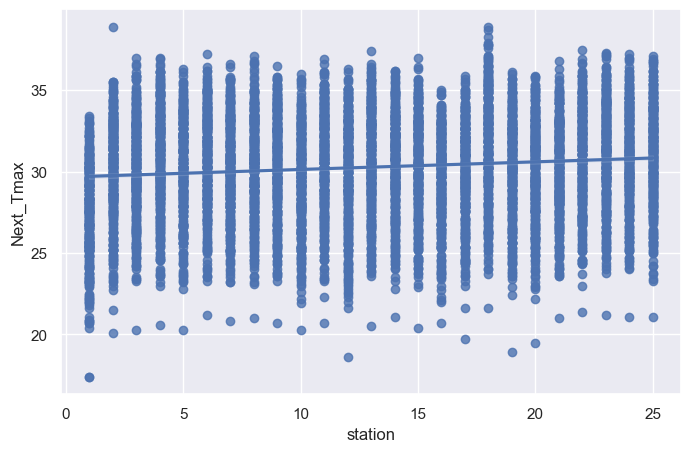

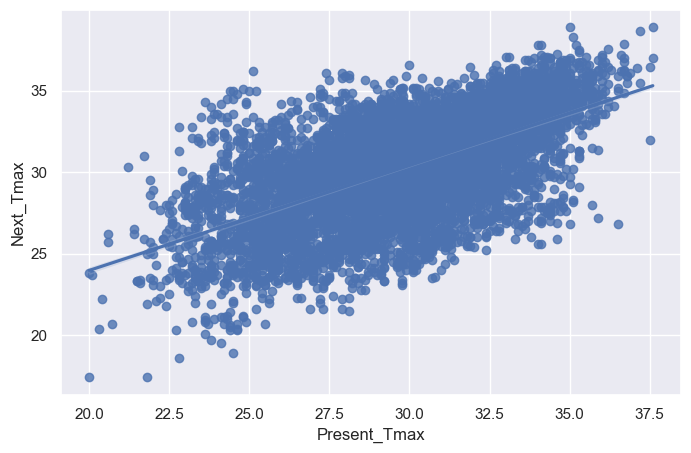

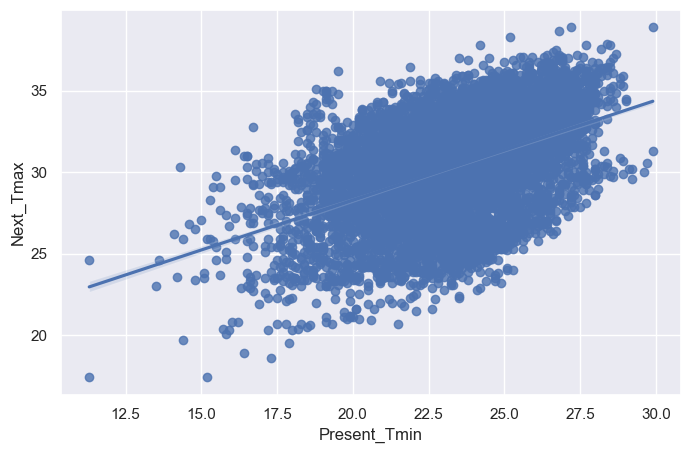

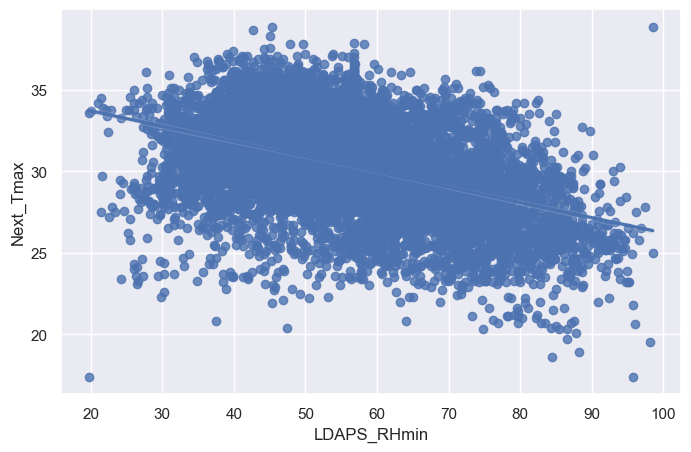

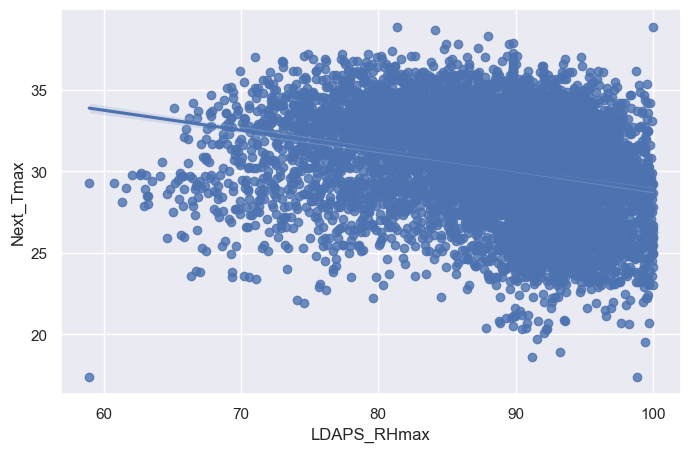

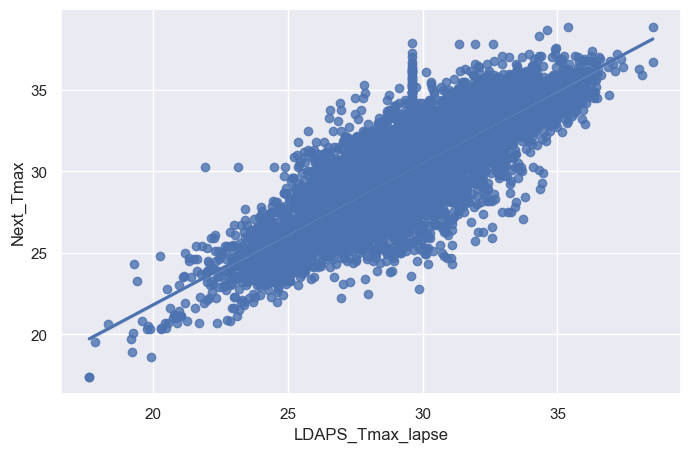

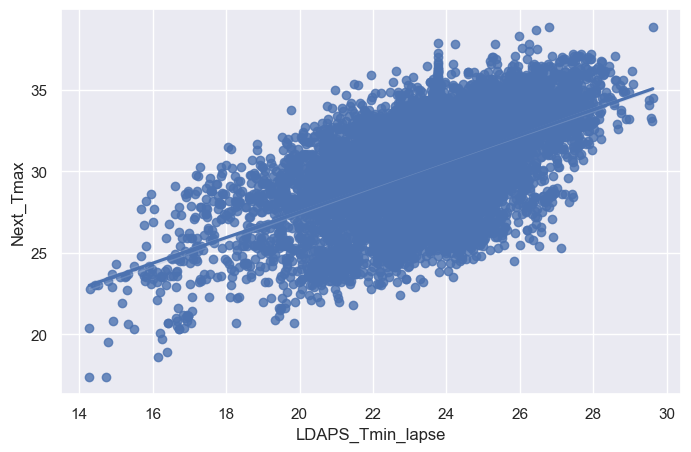

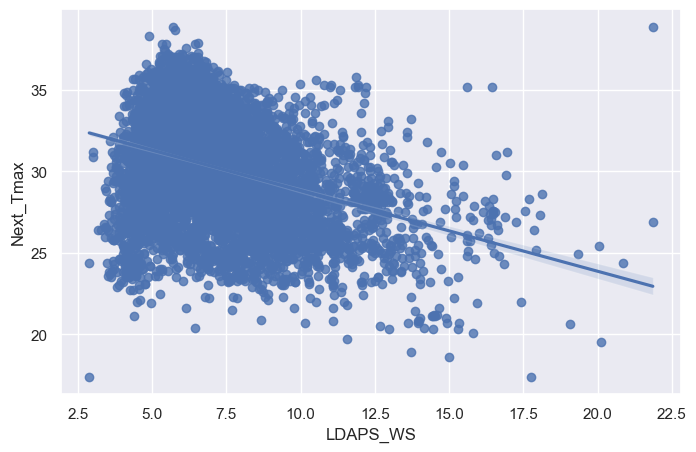

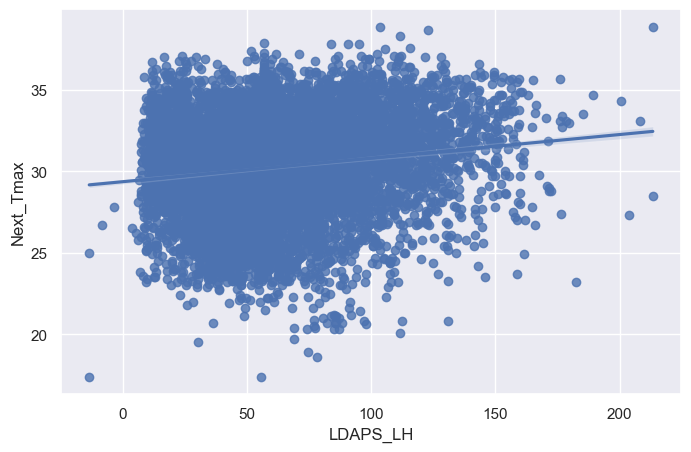

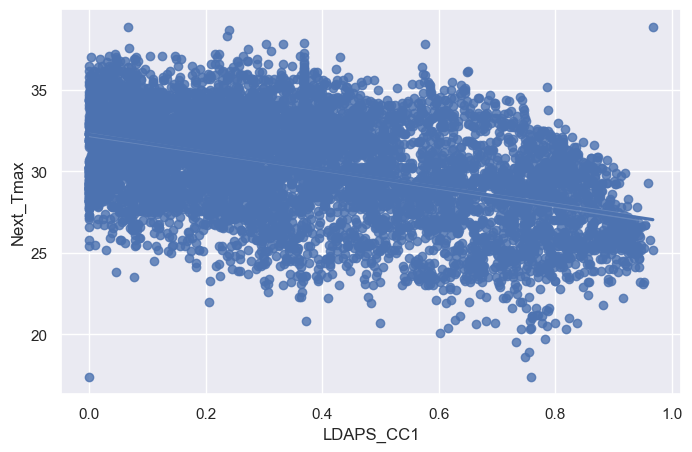

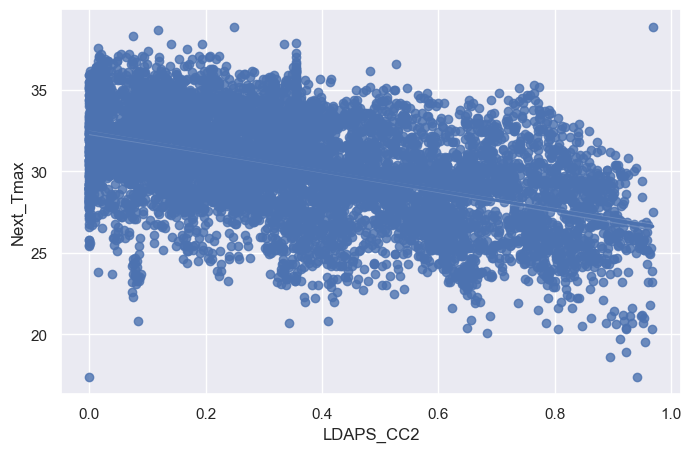

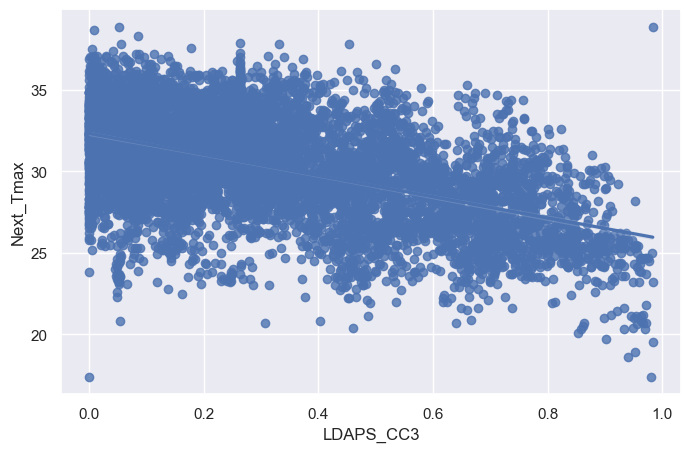

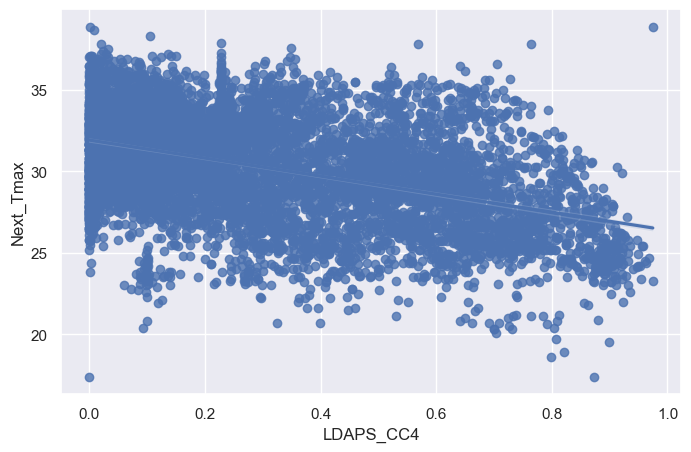

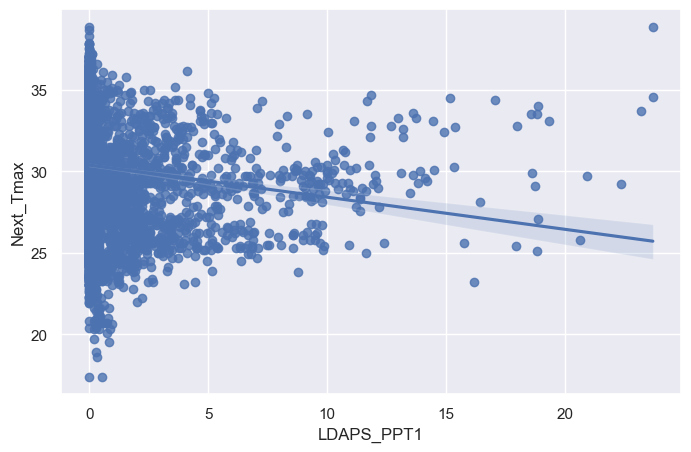

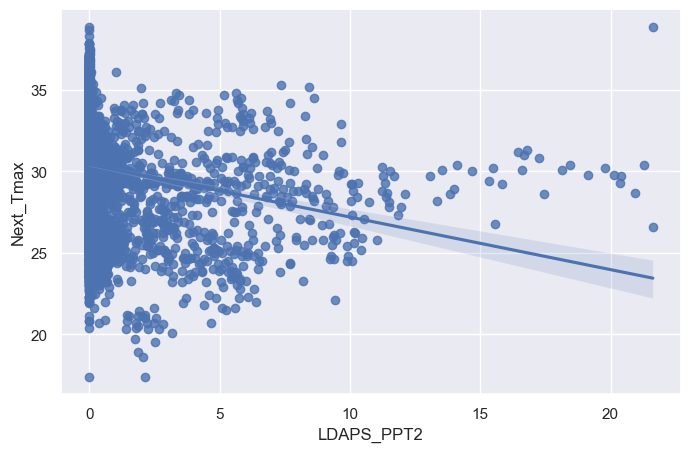

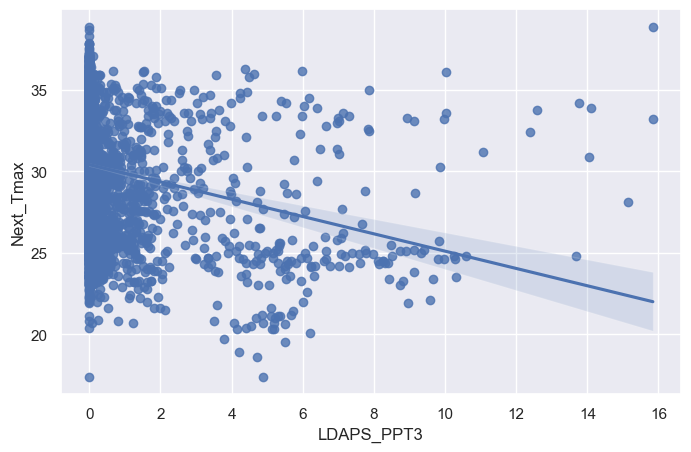

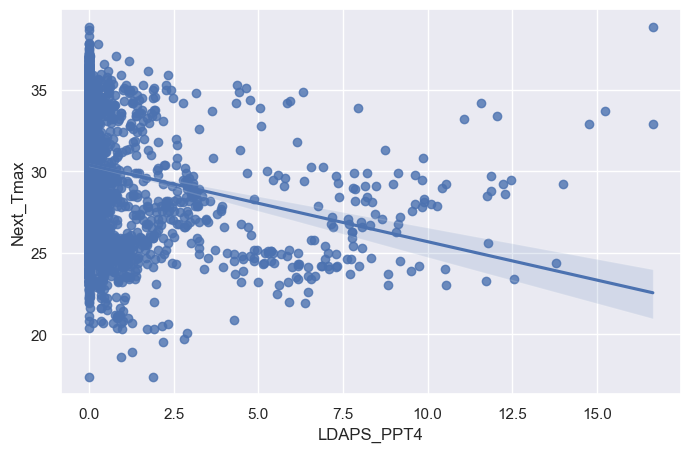

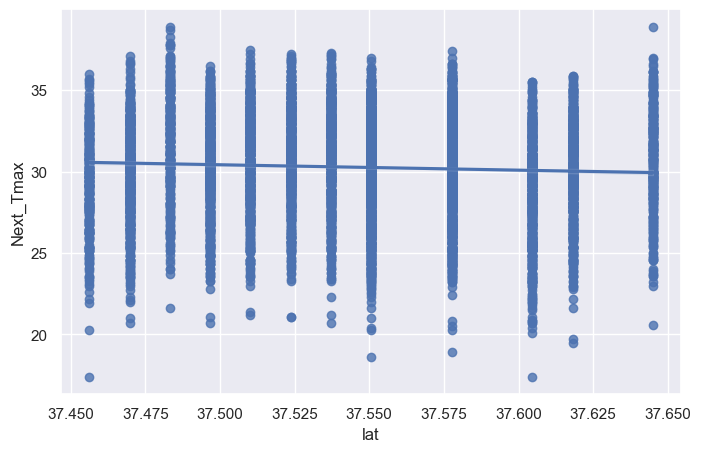

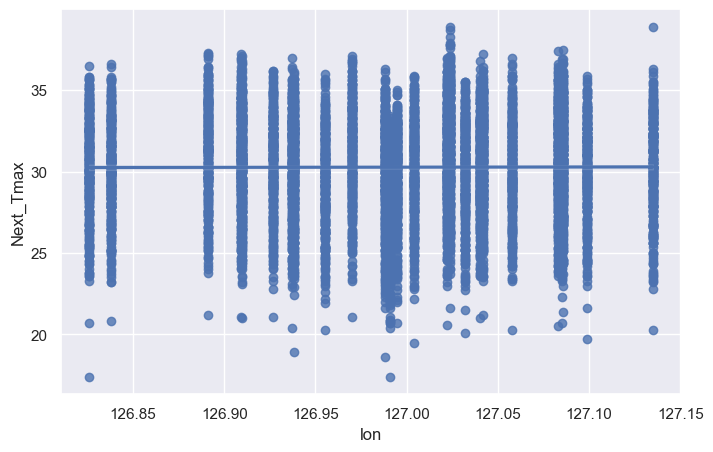

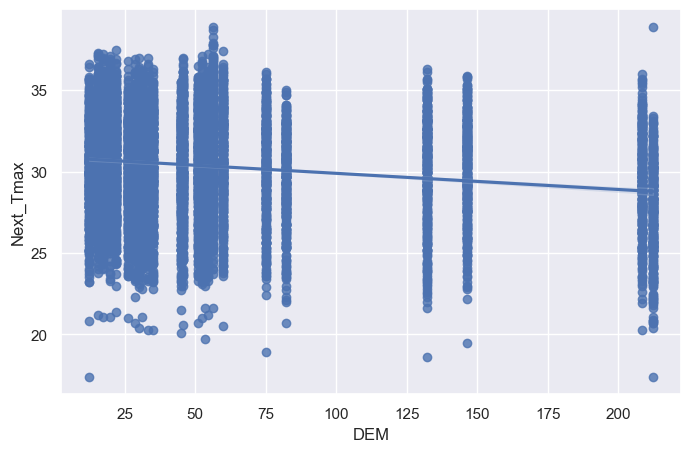

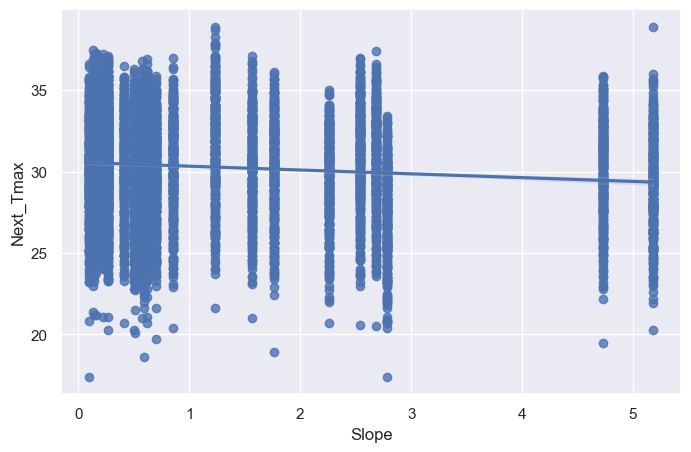

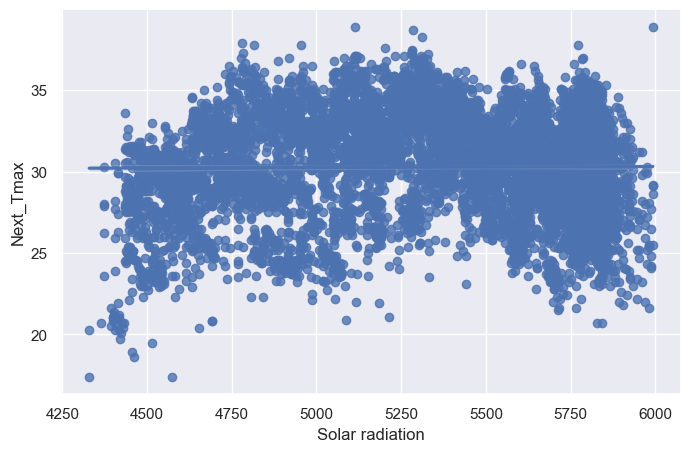

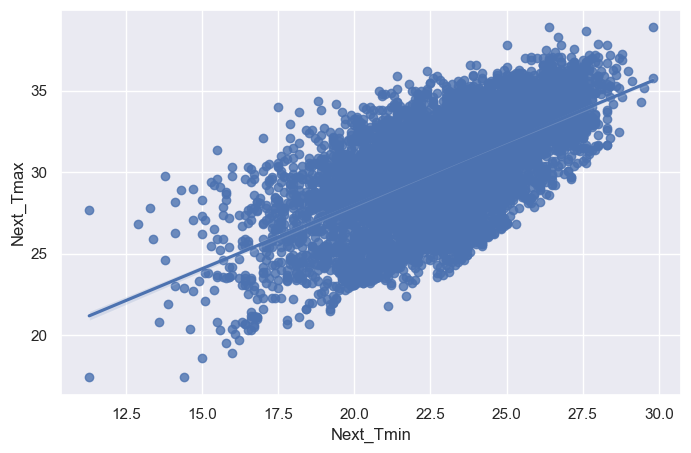

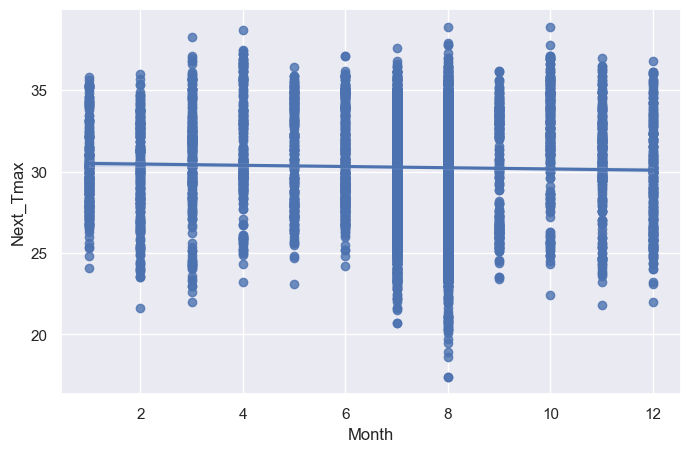

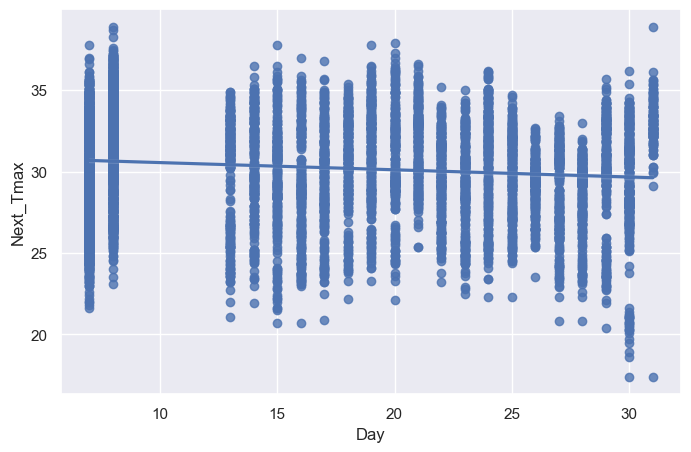

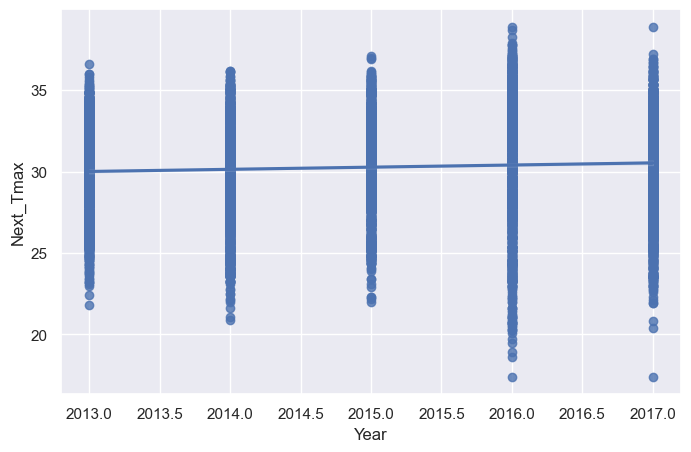

In [29]:
#Checking regplot of all numerical columns with the target variable Next_Tmax -

for i in df.drop(['Next_Tmax'],axis=1):
    plt.figure(figsize=(8,5))
    sns.regplot(data = df, x = i, y = 'Next_Tmax')
    plt.show()

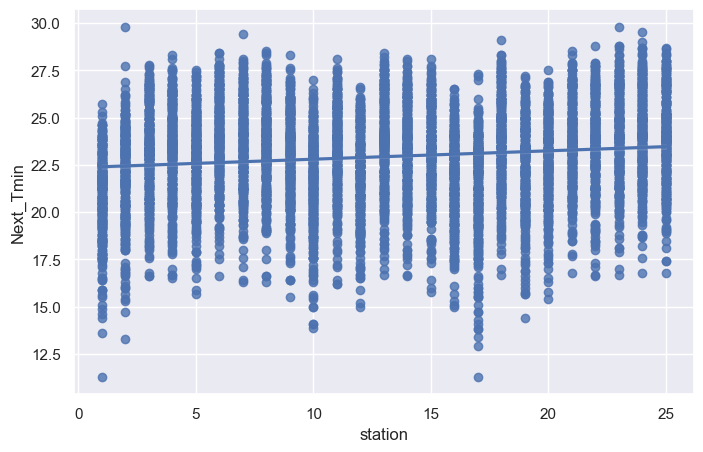

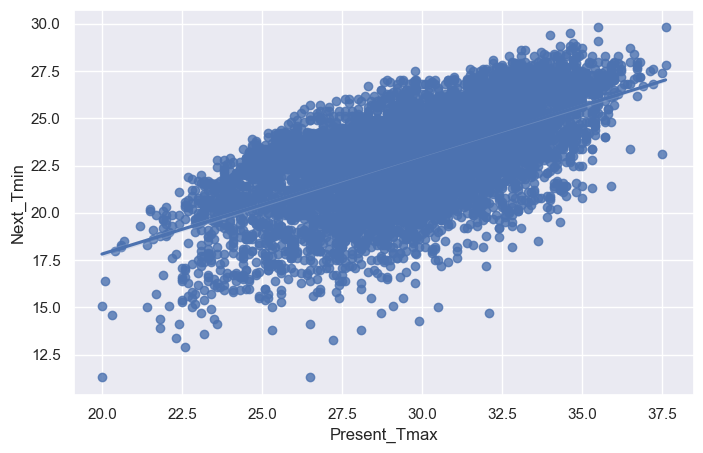

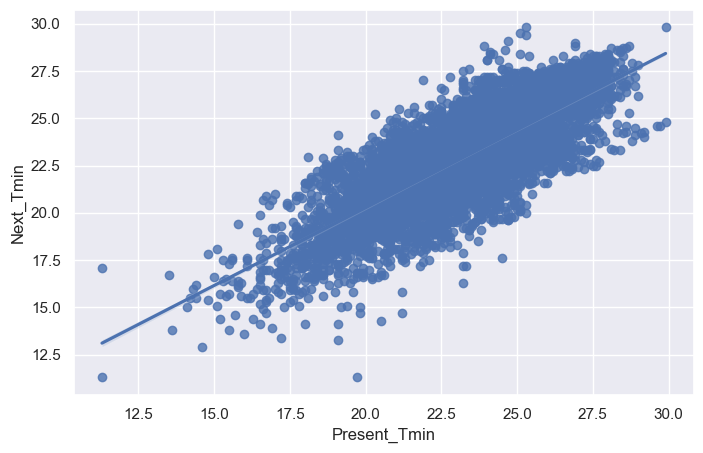

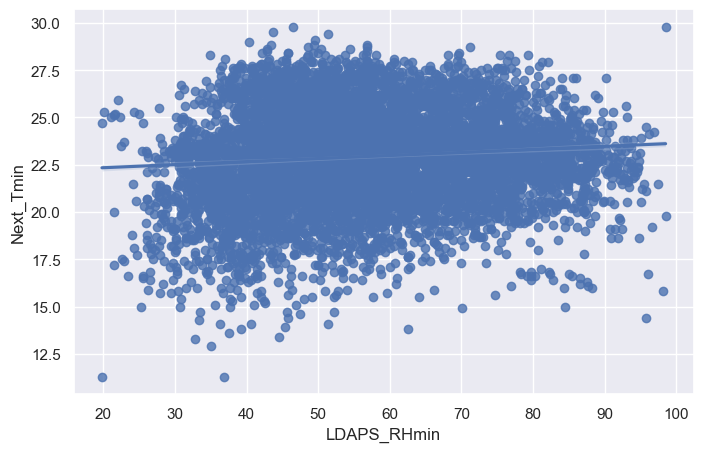

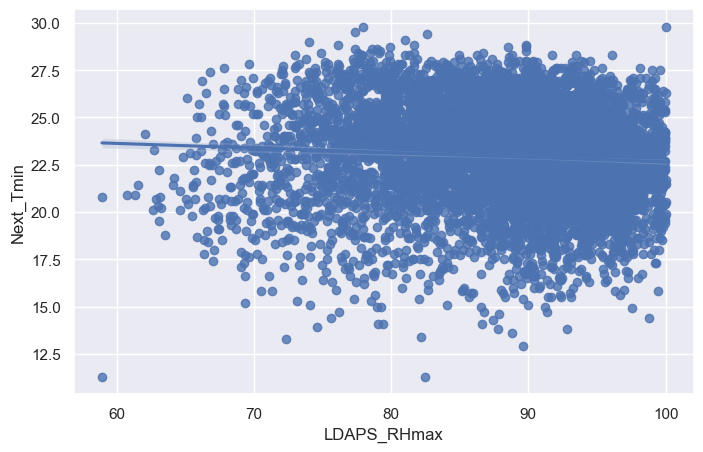

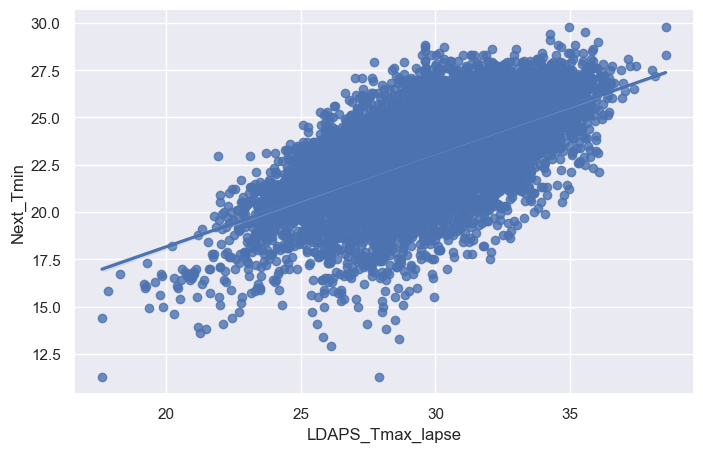

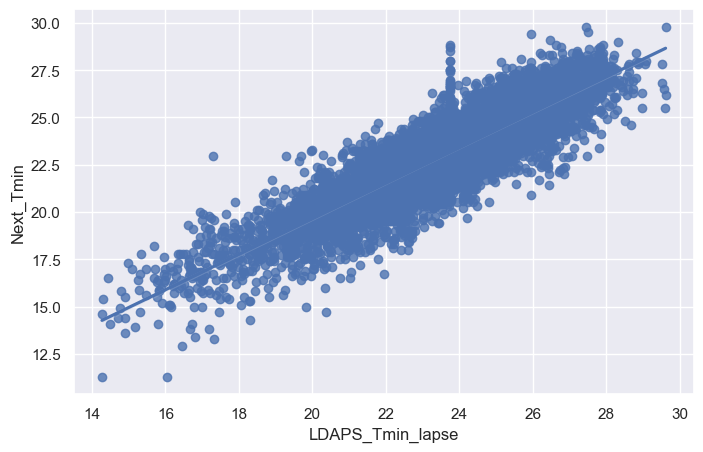

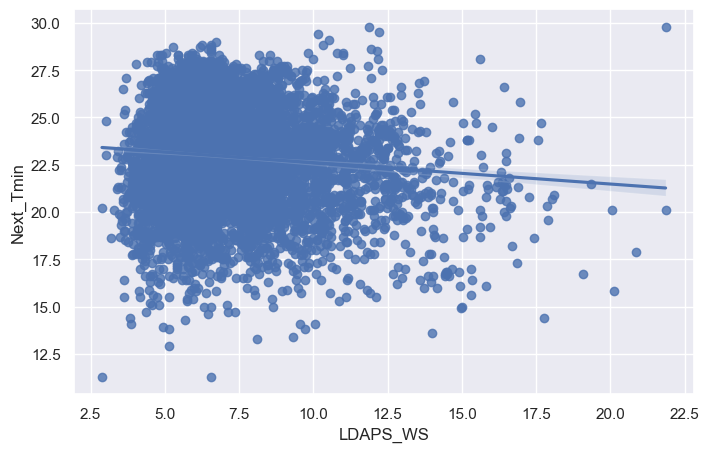

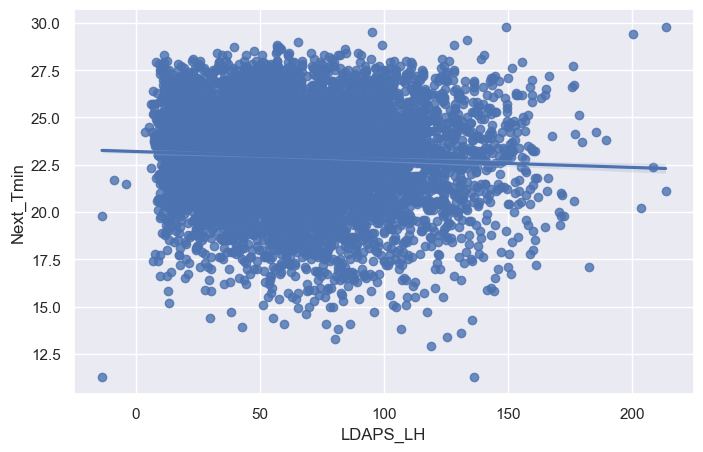

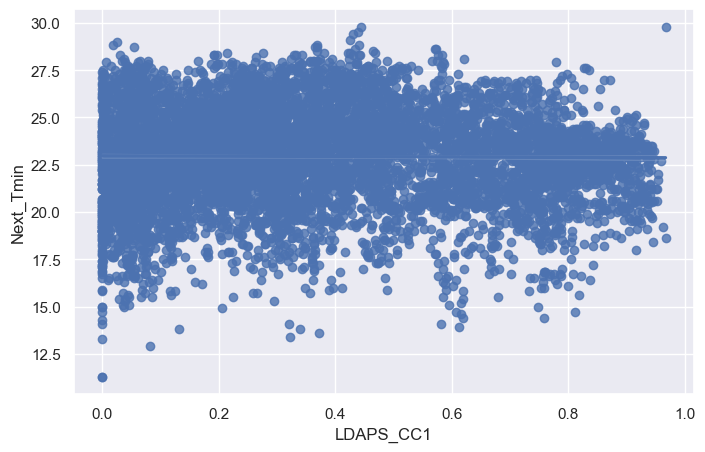

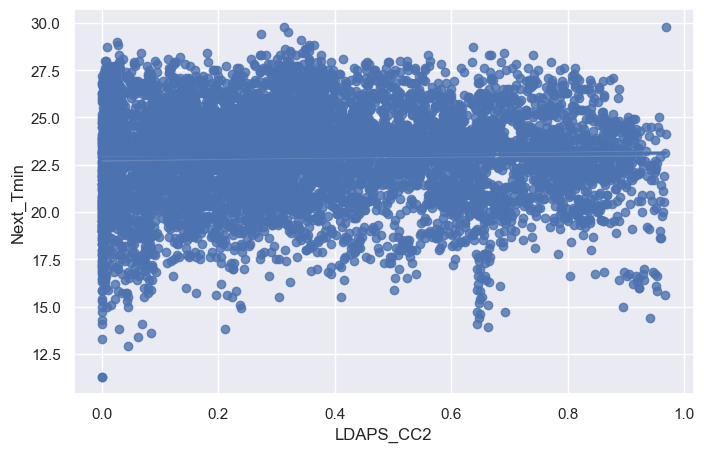

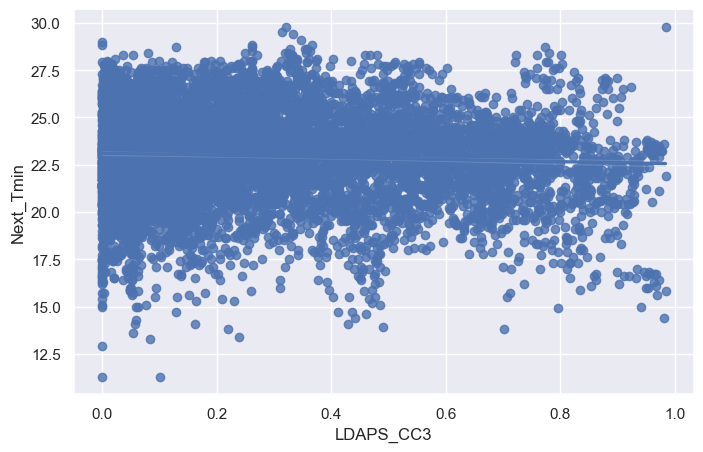

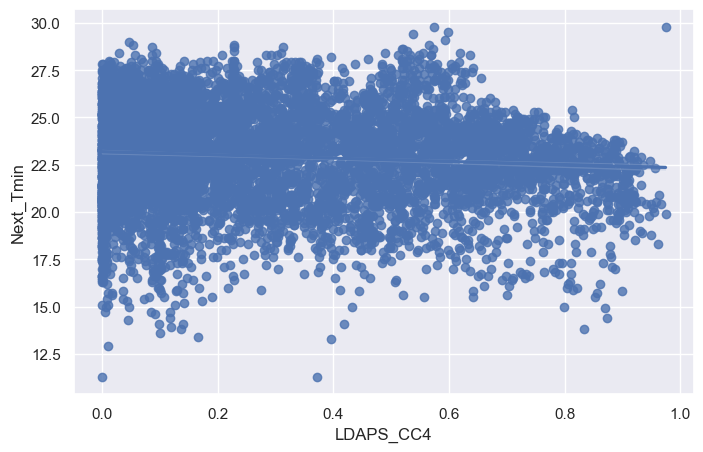

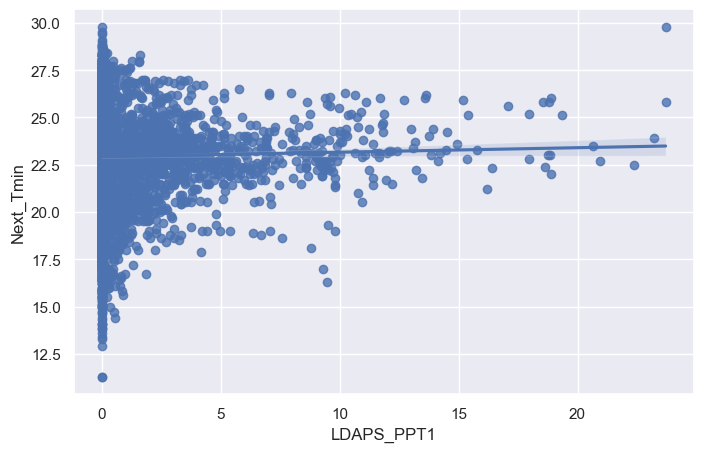

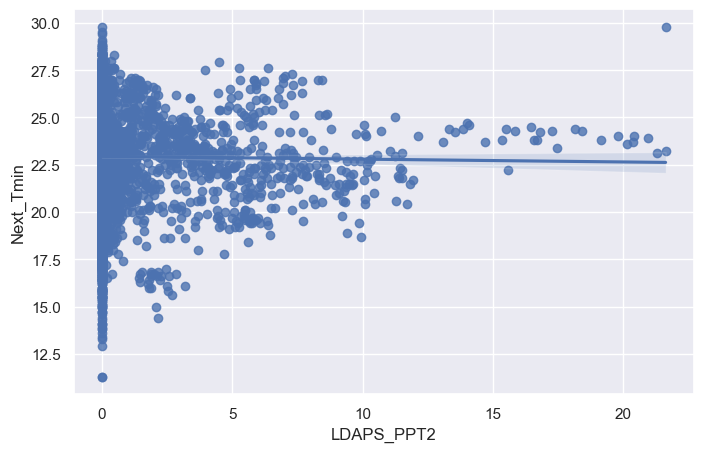

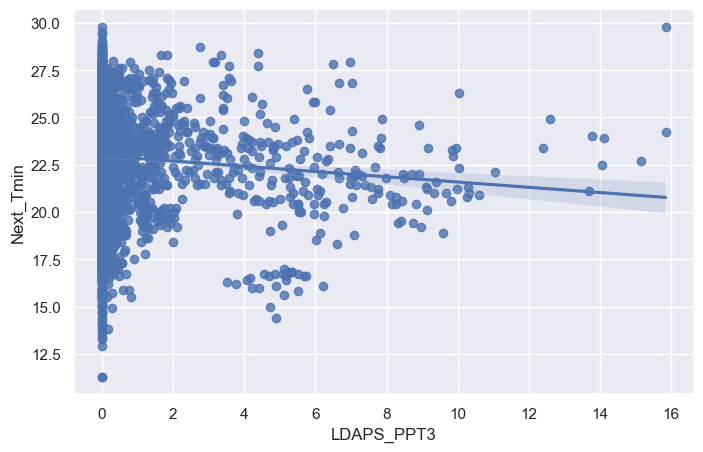

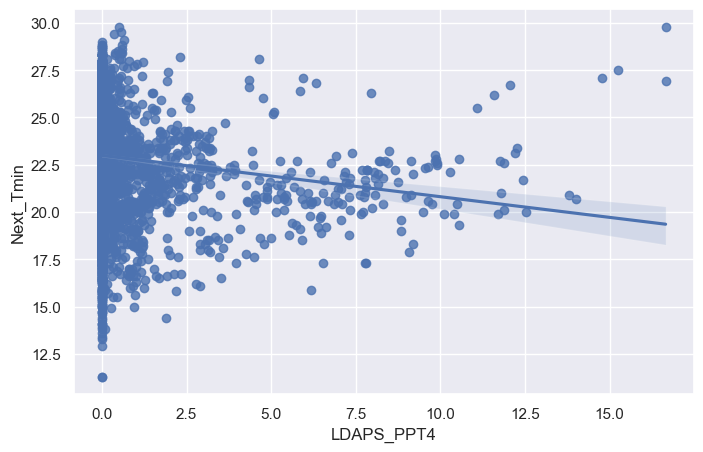

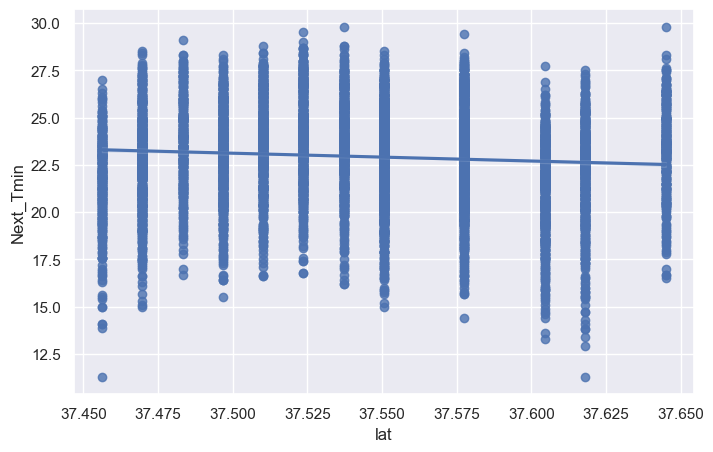

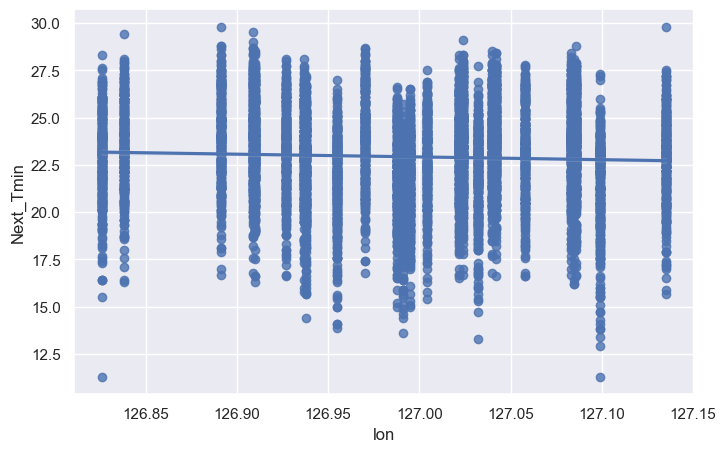

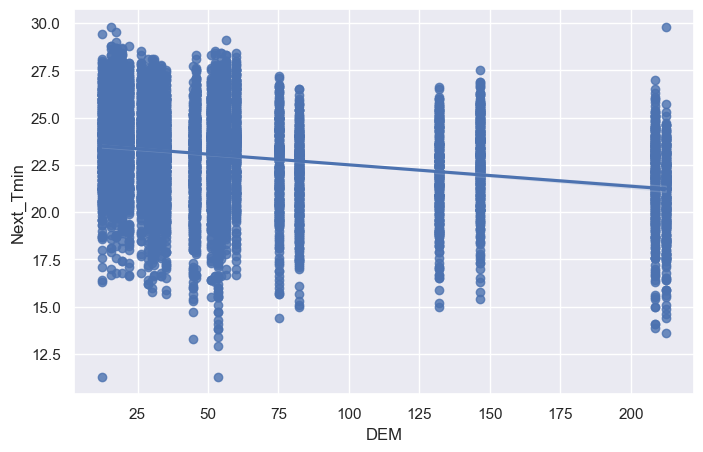

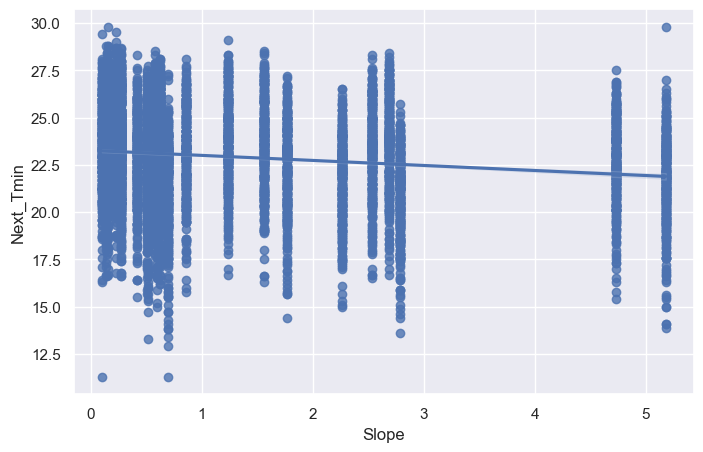

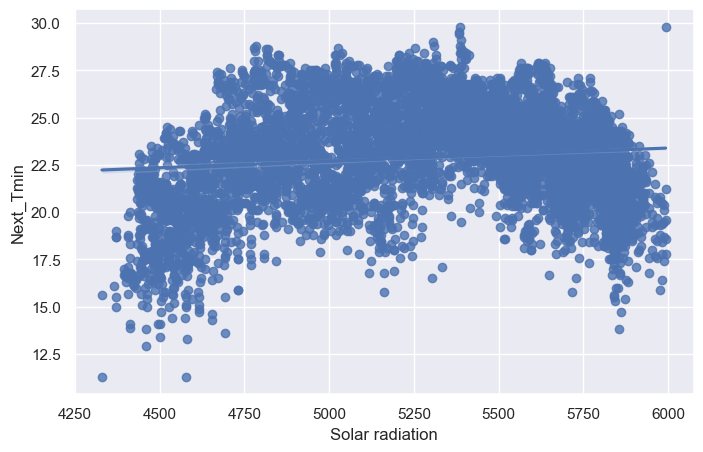

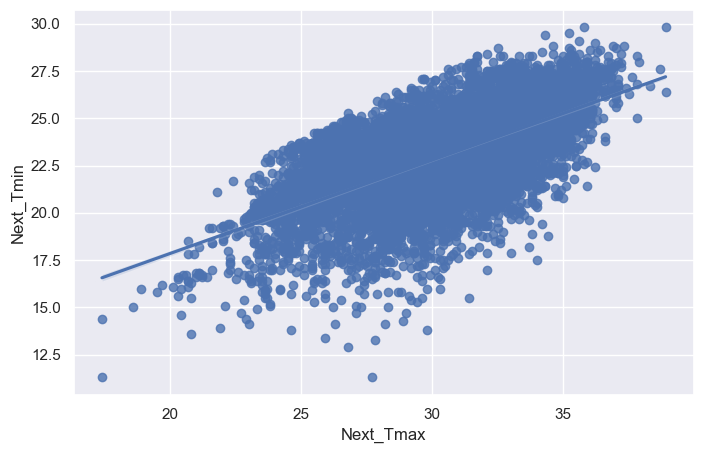

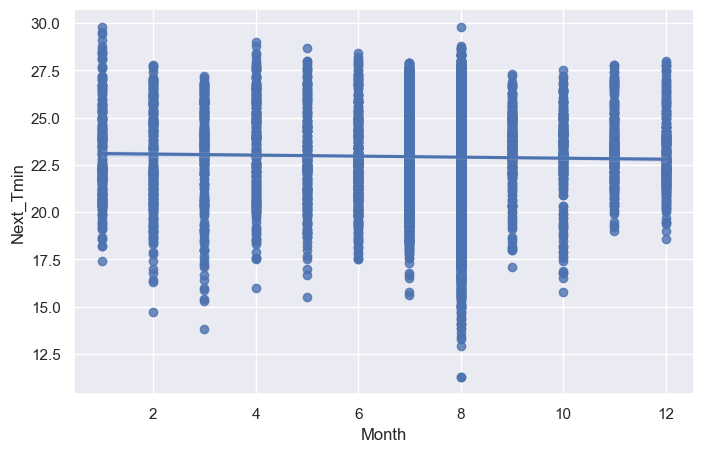

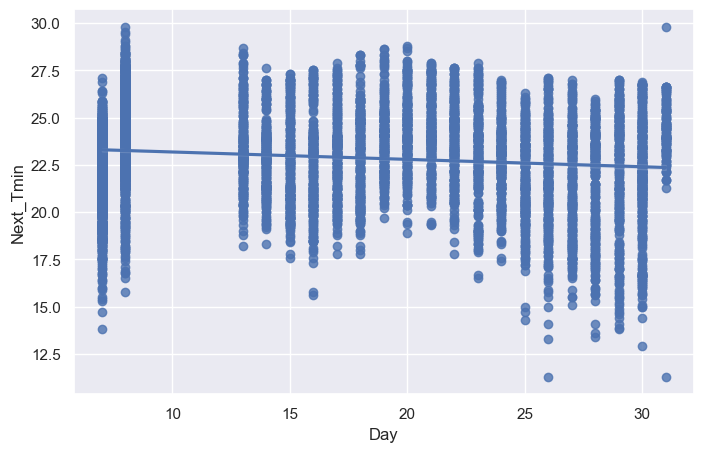

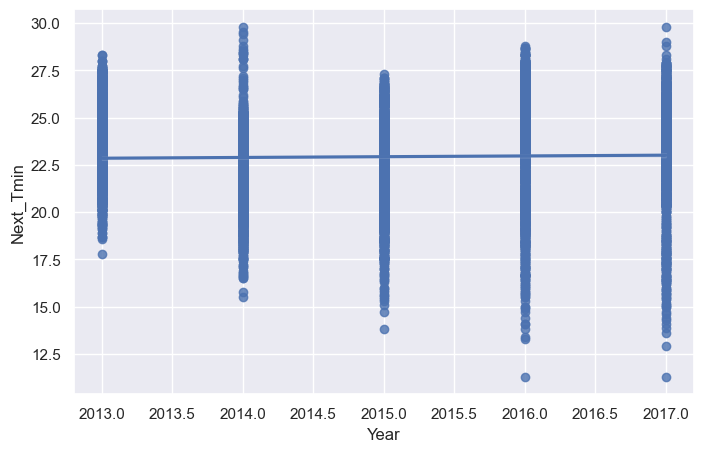

In [30]:
#Checking regplot of all numerical columns with the target variable Next_Tmin -

for i in df.drop(['Next_Tmin'],axis=1):
    plt.figure(figsize=(8,5))
    sns.regplot(data = df, x = i, y = 'Next_Tmin')
    plt.show()

Multivariate Analysis

I'm getting an error while uploading the file on GitHub. Yowza, that’s a big file. Try again with a file smaller than 25MB. I've removed the sns.pairplot part where I put hue = Next_Tmin and Next_Tmax.

In [32]:
#Correlation between the target and independent variables

df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112806      0.132122    -0.066731   
Present_Tmax      0.112806      1.000000      0.618760    -0.204571   
Present_Tmin      0.132122      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066731     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166334     -0.300322     -0.012754     0.579032   
LDAPS_Tmax_lapse  0.069363      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.105053      0.624216      0.764227     0.089471   
LDAPS_WS          0.004353     -0.123582     -0.037708     0.294271   
LDAPS_LH         -0.133693      0.134251     -0.011276    -0.070848   
LDAPS_CC1         0.006769     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003223     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000442     -0.145577     -0.005466     0.689513   
LDAPS_CC4         0.005849     -0.142683     -0.047714     0.513878   
LDAPS_PPT1       -0.004990     -0.111129      0.109121     0.262547   
LDAPS_PPT2       -0.010555     -0.101377      0.064829     0.390824   
LDAPS_PPT3       -0.015051     -0.122044     -0.049005     0.240576   
LDAPS_PPT4       -0.013033     -0.101178     -0.065647     0.168555   
lat              -0.237438     -0.052615     -0.078475     0.087099   
lon              -0.118574      0.009020     -0.043461    -0.076237   
DEM              -0.256095     -0.187121     -0.250275     0.102115   
Slope            -0.090413     -0.105809     -0.146339     0.123744   
Solar radiation  -0.018787     -0.025439      0.053578     0.244080   
Next_Tmax         0.108289      0.610348      0.471806    -0.437898   
Next_Tmin         0.128713      0.622741      0.796670     0.095019   
Month            -0.000169     -0.001185     -0.003550    -0.053922   
Day              -0.000730     -0.143899     -0.108728    -0.065735   
Year             -0.000582      0.059665      0.036987    -0.001984   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166334          0.069363          0.105053  0.004353   
Present_Tmax        -0.300322          0.570129          0.624216 -0.123582   
Present_Tmin        -0.012754          0.464151          0.764227 -0.037708   
LDAPS_RHmin          0.579032         -0.564580          0.089471  0.294271   
LDAPS_RHmax          1.000000         -0.373334         -0.113914  0.134786   
LDAPS_Tmax_lapse    -0.373334          1.000000          0.653985 -0.311900   
LDAPS_Tmin_lapse    -0.113914          0.653985          1.000000 -0.130245   
LDAPS_WS             0.134786         -0.311900         -0.130245  1.000000   
LDAPS_LH             0.238183          0.048004         -0.134906  0.007115   
LDAPS_CC1            0.436570         -0.438439          0.010900  0.289356   
LDAPS_CC2            0.391256         -0.523619          0.047725  0.261010   
LDAPS_CC3            0.226434         -0.541197         -0.044233  0.243402   
LDAPS_CC4            0.130008         -0.429374         -0.080587  0.221066   
LDAPS_PPT1           0.267698         -0.111016          0.037727  0.153213   
LDAPS_PPT2           0.228398         -0.242033          0.000588  0.192427   
LDAPS_PPT3           0.134087         -0.188063         -0.088791  0.162173   
LDAPS_PPT4           0.117376         -0.160235         -0.094855  0.144550   
lat                  0.195761         -0.042093         -0.096252  0.036646   
lon                  0.025662          0.090666         -0.026700 -0.059448   
DEM                  0.177134         -0.178895         -0.195445  0.190995   
Slope                0.219557         -0.162332         -0.185839  0.171577   
Solar radiation      0.148259          0.047971          0.159445  0.122966   
Next_Tmax           -0.281341          0.827189          0.588206 -0.345619   
Next_Tmin           -0.070246          0.586868          0.881059 -0.098767   
Month               -0.039040         -0.021745        

<Axes: >

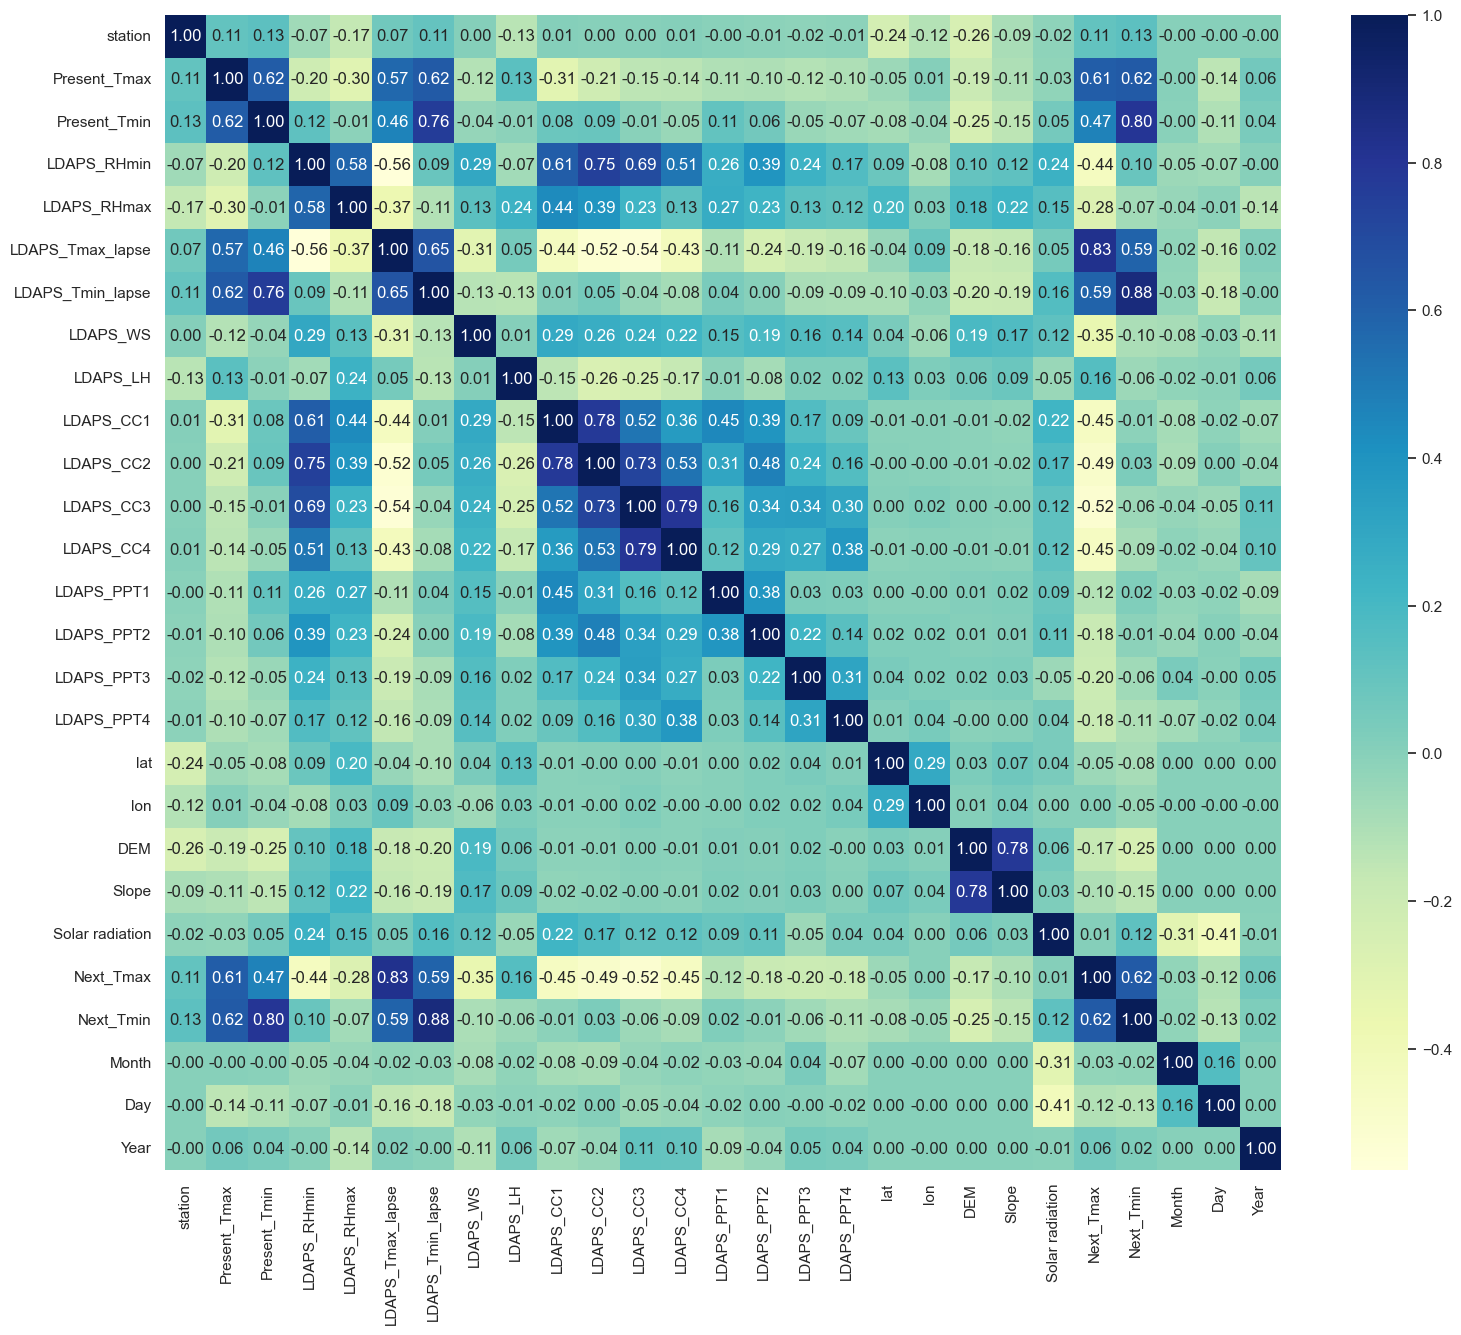

In [33]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, linecolor='black',fmt='0.2f',cmap='YlGnBu')

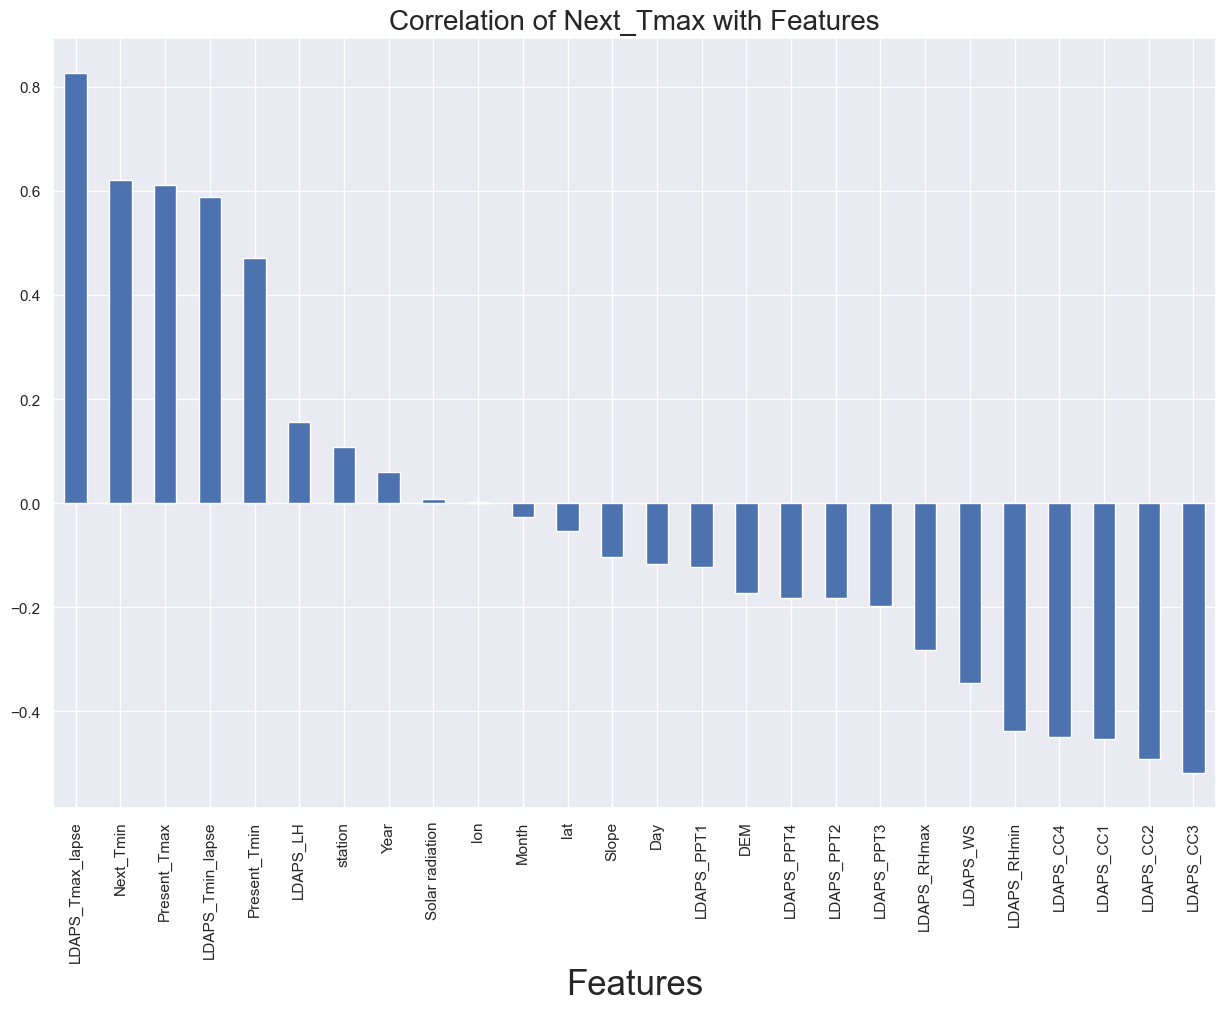

In [34]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar')
plt.title('Correlation of Next_Tmax with Features',fontsize=20)
plt.xlabel('Features', fontsize=25)
plt.show()

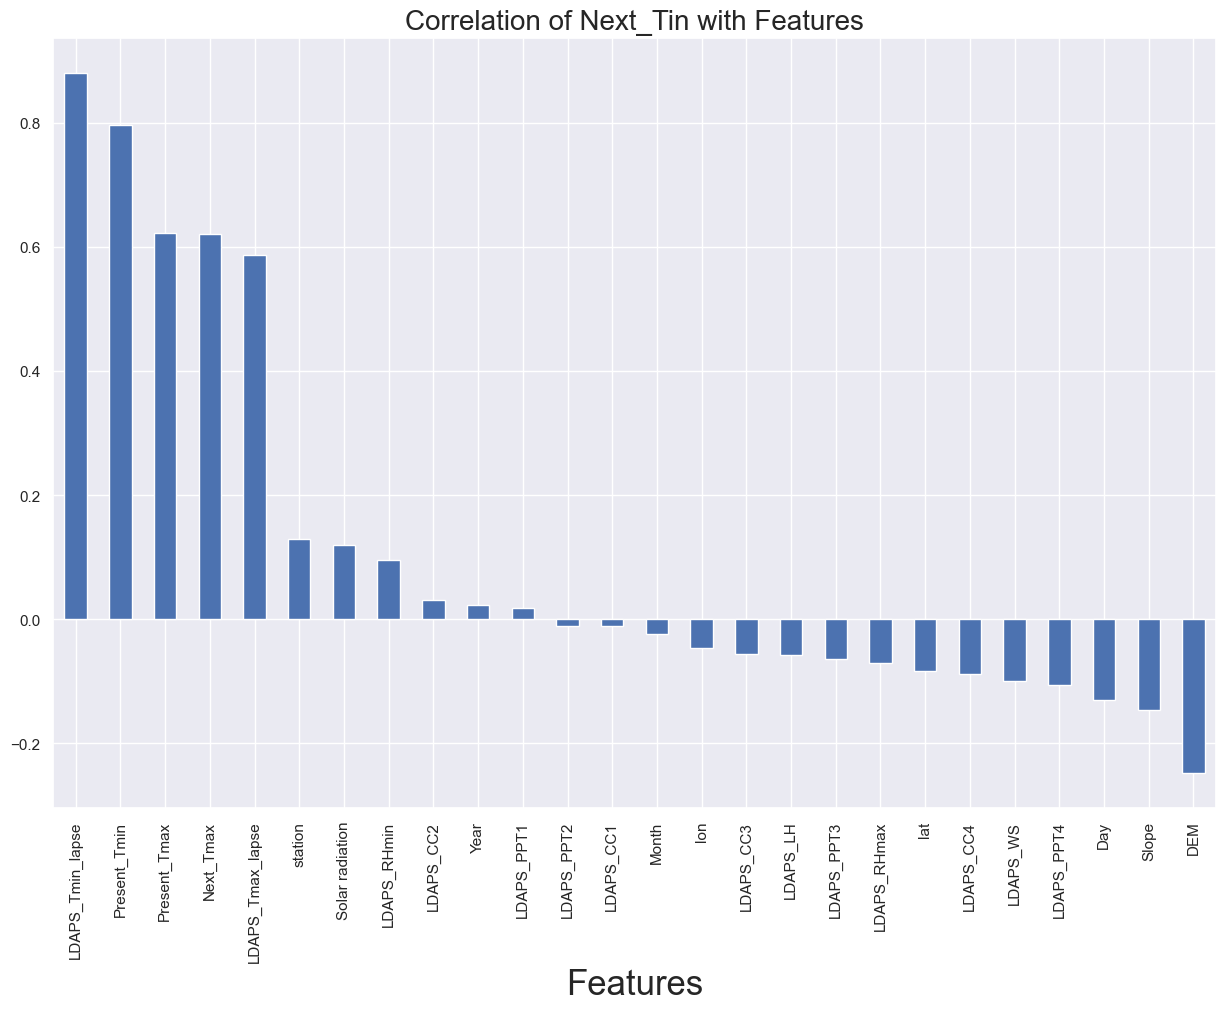

In [35]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar')
plt.title('Correlation of Next_Tin with Features',fontsize=20)
plt.xlabel('Features', fontsize=25)
plt.show()

Conclusions:

1. The target variable "Next_Tmax" is highly positively correlated with Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse. 

2. The target variable "Next_Tmax" is negatively correlated with LDAPS_RHmin, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4.

3. The target variable "Next_Tmax" is weakly positively / negatively correlated with other features.

4. The target variable "Next_Tmin" is highly positively correlated with Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse. 

5. The target variable "Next_Tmin" is not highly negatively correlated with any features, whereas this variable is weakly positively / negatively correlated with other features.

6. Both the target variables are highly correlated with each other.

Removing Outliers

In [91]:
from scipy.stats import zscore
features=df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]
z=np.abs(zscore(features))
z

Present_Tmax  Present_Tmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.361326      0.759529     0.381088          0.524889   
1         0.721084      0.676296     0.309610          0.080895   
2         0.619608      0.031188     0.616784          0.162936   
3         0.754909      0.072805     1.130923          0.031092   
4         0.551957      0.551446     0.246800          0.170325   
...            ...           ...          ...               ...   
7747      2.187892      2.549048     1.329793          1.112066   
7748      2.187892      2.299348     1.549810          0.887662   
7749      2.221718      2.424198     1.556967          0.570780   
7750      3.304127      4.962817     4.114586          4.087857   
7751      2.649126      2.777891     1.622186          3.044561   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
0             0.217678  0.125893  0.208564    0.302656    0.273714   
1             0.222809  0.644345  0.313173    0.302656    0.273714   
2             0.450160  0.439018  1.247488    0.302656    0.273714   
3             0.080896  0.663593  0.097609    0.302656    0.273714   
4             0.012213  0.624511  1.355851    0.302656    0.273714   
...                ...       ...       ...         ...         ...   
7747          2.030596  0.434099  0.286208    0.302656    0.273714   
7748          2.048660  0.252892  0.453062    0.302656    0.273714   
7749          2.138873  0.090494  1.589557    0.302656    0.273714   
7750          3.959959  1.936712  2.265567    0.302656    0.273714   
7751          2.615464  6.792373  4.497062   11.933093   12.047815   

      LDAPS_PPT3  LDAPS_PPT4       DEM     Slope     Month  
0       0.238242    0.222227  2.772243  1.115004  0.482972  
1       0.238242    0.222227  0.315157  0.542158  0.482972  
2       0.238242    0.222227  0.526218  0.723133  0.482972  
3       0.238242    0.222227  0.297588  0.932424  0.482972  
4       0.238242    0.222227  0.494322  0.548433  0.482972  
...          ...         ...       ...       ...       ...  
7747    0.238242    0.222227  0.852681  0.803915  0.410691  
7748    0.238242    0.222227  0.821213  0.755095  0.410691  
7749    0.238242    0.222227  0.779043  0.719338  0.410691  
7750    0.238242    0.222227  0.911963  0.845455  0.410691  
7751   13.460269   13.650667  2.772243  2.861435  0.410691  

[7752 rows x 14 columns]

In [92]:
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 5,  8,  8, ...,  8,  9, 10], dtype=int64))

In [93]:
df1=df[(z<3).all(axis=1)]

In [94]:
df1.shape[0]

6907

In [95]:
df.shape[0]

7752

In [96]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100

10.900412796697626

The above value shows the percentage loss of the data i.e, 10.9%

In [97]:
df=df[(z<3).all(axis=1)]
df.shape

(6907, 27)

This is our new dataset after the removal of outliers.

# Seperating Target and Features for Next_Tmax

In [43]:
X=df.drop("Next_Tmax", axis=1)
Y=df["Next_Tmax"]

In [44]:
X.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.691582
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            1.095290
LDAPS_LH            0.571067
LDAPS_CC1           0.593987
LDAPS_CC2           0.501474
LDAPS_CC3           0.709766
LDAPS_CC4           0.721344
LDAPS_PPT1          3.753955
LDAPS_PPT2          4.874124
LDAPS_PPT3          5.517553
LDAPS_PPT4          5.974954
lat                 0.106291
lon                -0.276193
DEM                 1.761452
Slope               1.592353
Solar radiation    -0.503706
Next_Tmin          -0.293914
Month              -0.684769
Day                 0.252759
Year                0.008778
dtype: float64

In [45]:
columns = ['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
X[columns] = scaler.fit_transform(X[columns].values)
X[columns].head()

LDAPS_RHmax  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC3  LDAPS_CC4  \
0     0.346063  0.174832  0.348532  -0.314050  -0.466721  -0.515847   
1     0.258189 -0.580788 -0.171523  -0.355362  -0.480044  -0.536143   
2    -0.727707 -0.256401 -1.389124  -0.436093  -0.227337  -0.446115   
3     1.383082 -0.613158  0.243784  -0.400729  -0.469906  -0.494965   
4     0.182456 -0.547803  1.303411  -0.743981  -0.367077  -0.280551   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM     Slope  \
0   -0.523431   -0.482904   -0.460001   -0.412137  1.852887  1.328375   
1   -0.523431   -0.482904   -0.460001   -0.412137  0.067654 -0.375727   
2   -0.523431   -0.482904   -0.460001   -0.412137 -0.355375 -0.944412   
3   -0.523431   -0.482904   -0.460001   -0.412137  0.096712  1.249749   
4   -0.523431   -0.482904   -0.460001   -0.412137 -0.280781 -0.392244   

   Solar radiation     Month  
0         1.887001 -0.583609  
1         1.433197 -0.583609  
2         1.412903 -0.583609  
3         1.389759 -0.583609  
4         1.398834 -0.583609

In [47]:
X.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.100108
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            0.006054
LDAPS_LH           -0.028792
LDAPS_CC1           0.062695
LDAPS_CC2           0.501474
LDAPS_CC3           0.092375
LDAPS_CC4           0.141116
LDAPS_PPT1          1.625143
LDAPS_PPT2          1.828579
LDAPS_PPT3          2.005782
LDAPS_PPT4          2.284866
lat                 0.106291
lon                -0.276193
DEM                 0.038646
Slope               0.233614
Solar radiation    -0.166195
Next_Tmin          -0.293914
Month               0.039871
Day                 0.252759
Year                0.008778
dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.671979     -0.430760     -0.821754     0.193211     0.346063   
1    -1.533033      0.688750     -0.735346    -0.240045     0.258189   
2    -1.394087      0.583796     -0.000870    -0.498375    -0.727707   
3    -1.255141      0.723735      0.042335     0.192061     1.383082   
4    -1.116195      0.513827     -0.605732     0.042707     0.182456   
...        ...           ...           ...          ...          ...   
6902  1.106942     -2.389904     -2.377115    -2.233737    -1.377192   
6903  1.245888     -2.599813     -2.549933    -1.842881    -0.763994   
6904  1.384834     -2.319935     -2.679546    -2.085350    -1.315749   
6905  1.523780     -2.319935     -2.420320    -2.280615    -1.471258   
6906  1.662726     -2.354920     -2.549933    -2.360699    -1.476127   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.659354         -0.285480  0.174832  0.348532  -0.314050  ...   
1            -0.010082          0.176037 -0.580788 -0.171523  -0.355362  ...   
2             0.077849          0.414242 -0.256401 -1.389124  -0.436093  ...   
3            -0.063461         -0.142168 -0.613158  0.243784  -0.400729  ...   
4            -0.279337         -0.070205 -0.547803  1.303411  -0.743981  ...   
...                ...               ...       ...       ...        ...  ...   
6902         -0.754887         -2.397140  0.045594 -2.025849  -1.344838  ...   
6903         -1.159742         -2.616648 -0.522747  0.686545  -1.255576  ...   
6904         -1.288685         -2.184953 -0.249068  0.420226  -1.500685  ...   
6905         -1.048171         -2.203879  0.008207 -0.324875  -1.460236  ...   
6906         -0.708540         -2.298400  0.436063 -2.063100  -1.371266  ...   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.412137  1.212696  0.001303  1.852887  1.328375         1.887001   
1      -0.412137  1.212696  0.516019  0.067654 -0.375727         1.433197   
2      -0.412137  0.672910  0.842425 -0.355375 -0.944412         1.412903   
3      -0.412137  2.020375  0.390479  0.096712  1.249749         1.389759   
4      -0.412137  0.135124  1.809087 -0.280781 -0.392244         1.398834   
...          ...       ...       ...       ...       ...              ...   
6902   -0.412137  0.135124  0.616452 -0.714702 -0.269157        -1.766792   
6903   -0.412137 -0.674555  1.193938 -1.001190 -1.354272        -1.784779   
6904   -0.412137 -0.134769 -1.254102 -1.577802 -1.279095        -1.782879   
6905   -0.412137 -0.404662 -1.028129 -1.398861 -1.069422        -1.789086   
6906   -0.412137 -0.404662 -0.262332 -1.189722 -0.930156        -1.772734   

      Next_Tmin     Month       Day      Year  
0     -0.785463 -0.583609  1.660834 -1.425114  
1     -0.239035 -0.583609  1.660834 -1.425114  
2      0.349426 -0.583609  1.660834 -1.425114  
3      0.517558 -0.583609  1.660834 -1.425114  
4     -0.239035 -0.583609  1.660834 -1.425114  
...         ...       ...       ...       ...  
6902  -2.256615  0.357804  1.660834  1.433184  
6903  -2.508812  0.357804  1.660834  1.433184  
6904  -2.088483  0.357804  1.660834  1.433184  
6905  -1.794253  0.357804  1.660834  1.433184  
6906  -2.382714  0.357804  1.660834  1.433184  

[6907 rows x 26 columns]

Variance Inflation Factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['features'] = X.columns

vif

VIF values          features
0     1.287961           station
1     2.848013      Present_Tmax
2     3.357991      Present_Tmin
3     6.133584       LDAPS_RHmin
4     2.577336       LDAPS_RHmax
5     6.929164  LDAPS_Tmax_lapse
6     8.501211  LDAPS_Tmin_lapse
7     1.221054          LDAPS_WS
8     1.502302          LDAPS_LH
9     4.162884         LDAPS_CC1
10    5.527834         LDAPS_CC2
11    4.588516         LDAPS_CC3
12    2.789407         LDAPS_CC4
13    2.210415        LDAPS_PPT1
14    2.194728        LDAPS_PPT2
15    1.600494        LDAPS_PPT3
16    1.602562        LDAPS_PPT4
17    1.295586               lat
18    1.223967               lon
19    3.363708               DEM
20    2.864221             Slope
21    1.456548   Solar radiation
22    5.556298         Next_Tmin
23    1.124344             Month
24    1.249064               Day
25    1.128405              Year

# Modeling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [51]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    LR=LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Max r2 score is: ",MaxAccu, "at random state", MaxRS)

Max r2 score is:  0.7930213684720577 at random state 178


Creating Train Test Split

In [52]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=178,test_size=.30)

In [53]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics

In [54]:
RFR_model= RandomForestRegressor()
GBR_model= GradientBoostingRegressor()
ABR_model= AdaBoostRegressor()
BGR_model= BaggingRegressor()
DTR_model= DecisionTreeRegressor()
KNN_model= KNN()

model=[RFR_model,GBR_model,ABR_model,BGR_model,DTR_model,KNN_model]

In [55]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2_Score of',m, 'is', r2_score(y_test,pred)*100)
    print('MAE of ',m, 'is', metrics.mean_absolute_error(y_test,pred))
    print('MSE of', m , 'is', metrics.mean_squared_error(y_test,pred))
    print('RMSE of',m, 'is', np.sqrt(metrics.mean_squared_error(y_test,pred)))
    print('\n')
    print('*'*100)
    print('\n')

r2_Score of RandomForestRegressor() is 90.74308568136654
MAE of  RandomForestRegressor() is 0.6761631720518232
MSE of RandomForestRegressor() is 0.8074989211986534
RMSE of RandomForestRegressor() is 0.8986094375192447


****************************************************************************************************


r2_Score of GradientBoostingRegressor() is 87.0323520215731
MAE of  GradientBoostingRegressor() is 0.823629335580995
MSE of GradientBoostingRegressor() is 1.1311935481551962
RMSE of GradientBoostingRegressor() is 1.0635758309378773


****************************************************************************************************


r2_Score of AdaBoostRegressor() is 77.78406565342955
MAE of  AdaBoostRegressor() is 1.1217691028526762
MSE of AdaBoostRegressor() is 1.9379398361898235
RMSE of AdaBoostRegressor() is 1.3920990755653218


****************************************************************************************************


r2_Score of BaggingRegressor() is

Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
for i in model:
    print('Cross Validation score of', i , 'is', cross_val_score(i,X,Y,cv=5).mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Cross Validation score of RandomForestRegressor() is 67.3817443358887


**************************************************


Cross Validation score of GradientBoostingRegressor() is 69.47817837678934


**************************************************


Cross Validation score of AdaBoostRegressor() is 64.13000575139334


**************************************************


Cross Validation score of BaggingRegressor() is 64.68024361512077


**************************************************


Cross Validation score of DecisionTreeRegressor() is 43.63608161558082


**************************************************


Cross Validation score of KNeighborsRegressor() is 52.098383716766136


**************************************************




# Hyper Parameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters = { 'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

In [60]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [62]:
GCV.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [63]:
Final_model = RandomForestRegressor(max_leaf_nodes=9,max_depth=9, max_features=None, n_estimators=150)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('MAE value of Final model ', metrics.mean_absolute_error(y_test,pred))
print('MSE value of Final model', metrics.mean_squared_error(y_test,pred))
print("RMSE value of Final model:",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('r2_Score of Final model:',r2_score(y_test,pred)*100)

MAE value of Final model  1.2057197031389957
MSE value of Final model 2.4109150890545545
RMSE value of Final model: 1.5527121719927859
r2_Score of Final model: 72.36202572784839


Saving the Model

In [64]:
import joblib
joblib.dump(Final_model, "Tmax_pred")

['Tmax_pred']

Predicting the saved model

In [65]:
model=joblib.load("Tmax_pred")

In [66]:
prediction=model.predict(x_test)
prediction

array([31.80641519, 29.41160488, 28.44422969, ..., 27.28465657,
       29.1808037 , 29.50984461])

In [67]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     31.806415      32.6
1     29.411605      31.6
2     28.444230      25.1
3     29.568882      29.7
4     30.819319      29.1
...         ...       ...
2068  29.331546      32.0
2069  31.433456      30.0
2070  27.284657      26.1
2071  29.180804      31.4
2072  29.509845      28.4

[2073 rows x 2 columns]

# Seperating Target and Features for Next_Tmin

In [98]:
X=df.drop("Next_Tmin", axis=1)
Y=df["Next_Tmin"]

In [99]:
X.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.691582
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            1.095290
LDAPS_LH            0.571067
LDAPS_CC1           0.593987
LDAPS_CC2           0.501474
LDAPS_CC3           0.709766
LDAPS_CC4           0.721344
LDAPS_PPT1          3.753955
LDAPS_PPT2          4.874124
LDAPS_PPT3          5.517553
LDAPS_PPT4          5.974954
lat                 0.106291
lon                -0.276193
DEM                 1.761452
Slope               1.592353
Solar radiation    -0.503706
Next_Tmax          -0.270276
Month              -0.684769
Day                 0.252759
Year                0.008778
dtype: float64

In [100]:
columns = ['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [101]:
X[columns] = scaler.fit_transform(X[columns].values)
X[columns].head()

LDAPS_RHmax  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC3  LDAPS_CC4  \
0     0.346063  0.174832  0.348532  -0.314050  -0.466721  -0.515847   
1     0.258189 -0.580788 -0.171523  -0.355362  -0.480044  -0.536143   
2    -0.727707 -0.256401 -1.389124  -0.436093  -0.227337  -0.446115   
3     1.383082 -0.613158  0.243784  -0.400729  -0.469906  -0.494965   
4     0.182456 -0.547803  1.303411  -0.743981  -0.367077  -0.280551   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM     Slope  \
0   -0.523431   -0.482904   -0.460001   -0.412137  1.852887  1.328375   
1   -0.523431   -0.482904   -0.460001   -0.412137  0.067654 -0.375727   
2   -0.523431   -0.482904   -0.460001   -0.412137 -0.355375 -0.944412   
3   -0.523431   -0.482904   -0.460001   -0.412137  0.096712  1.249749   
4   -0.523431   -0.482904   -0.460001   -0.412137 -0.280781 -0.392244   

   Solar radiation     Month  
0         1.887001 -0.583609  
1         1.433197 -0.583609  
2         1.412903 -0.583609  
3         1.389759 -0.583609  
4         1.398834 -0.583609

In [102]:
X.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.100108
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            0.006054
LDAPS_LH           -0.028792
LDAPS_CC1           0.062695
LDAPS_CC2           0.501474
LDAPS_CC3           0.092375
LDAPS_CC4           0.141116
LDAPS_PPT1          1.625143
LDAPS_PPT2          1.828579
LDAPS_PPT3          2.005782
LDAPS_PPT4          2.284866
lat                 0.106291
lon                -0.276193
DEM                 0.038646
Slope               0.233614
Solar radiation    -0.166195
Next_Tmax          -0.270276
Month               0.039871
Day                 0.252759
Year                0.008778
dtype: float64

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.671979     -0.430760     -0.821754     0.193211     0.346063   
1    -1.533033      0.688750     -0.735346    -0.240045     0.258189   
2    -1.394087      0.583796     -0.000870    -0.498375    -0.727707   
3    -1.255141      0.723735      0.042335     0.192061     1.383082   
4    -1.116195      0.513827     -0.605732     0.042707     0.182456   
...        ...           ...           ...          ...          ...   
6902  1.106942     -2.389904     -2.377115    -2.233737    -1.377192   
6903  1.245888     -2.599813     -2.549933    -1.842881    -0.763994   
6904  1.384834     -2.319935     -2.679546    -2.085350    -1.315749   
6905  1.523780     -2.319935     -2.420320    -2.280615    -1.471258   
6906  1.662726     -2.354920     -2.549933    -2.360699    -1.476127   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.659354         -0.285480  0.174832  0.348532  -0.314050  ...   
1            -0.010082          0.176037 -0.580788 -0.171523  -0.355362  ...   
2             0.077849          0.414242 -0.256401 -1.389124  -0.436093  ...   
3            -0.063461         -0.142168 -0.613158  0.243784  -0.400729  ...   
4            -0.279337         -0.070205 -0.547803  1.303411  -0.743981  ...   
...                ...               ...       ...       ...        ...  ...   
6902         -0.754887         -2.397140  0.045594 -2.025849  -1.344838  ...   
6903         -1.159742         -2.616648 -0.522747  0.686545  -1.255576  ...   
6904         -1.288685         -2.184953 -0.249068  0.420226  -1.500685  ...   
6905         -1.048171         -2.203879  0.008207 -0.324875  -1.460236  ...   
6906         -0.708540         -2.298400  0.436063 -2.063100  -1.371266  ...   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.412137  1.212696  0.001303  1.852887  1.328375         1.887001   
1      -0.412137  1.212696  0.516019  0.067654 -0.375727         1.433197   
2      -0.412137  0.672910  0.842425 -0.355375 -0.944412         1.412903   
3      -0.412137  2.020375  0.390479  0.096712  1.249749         1.389759   
4      -0.412137  0.135124  1.809087 -0.280781 -0.392244         1.398834   
...          ...       ...       ...       ...       ...              ...   
6902   -0.412137  0.135124  0.616452 -0.714702 -0.269157        -1.766792   
6903   -0.412137 -0.674555  1.193938 -1.001190 -1.354272        -1.784779   
6904   -0.412137 -0.134769 -1.254102 -1.577802 -1.279095        -1.782879   
6905   -0.412137 -0.404662 -1.028129 -1.398861 -1.069422        -1.789086   
6906   -0.412137 -0.404662 -0.262332 -1.189722 -0.930156        -1.772734   

      Next_Tmax     Month       Day      Year  
0     -0.496440 -0.583609  1.660834 -1.425114  
1     -0.019482 -0.583609  1.660834 -1.425114  
2      0.184929 -0.583609  1.660834 -1.425114  
3      0.389340 -0.583609  1.660834 -1.425114  
4      0.218997 -0.583609  1.660834 -1.425114  
...         ...       ...       ...       ...  
6902  -1.007467  0.357804  1.660834  1.433184  
6903  -0.871193  0.357804  1.660834  1.433184  
6904  -0.768988  0.357804  1.660834  1.433184  
6905  -0.666782  0.357804  1.660834  1.433184  
6906  -0.939330  0.357804  1.660834  1.433184  

[6907 rows x 26 columns]

Variance Inflation Factor

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['features'] = X.columns

vif

VIF values          features
0     1.299928           station
1     2.929930      Present_Tmax
2     3.108858      Present_Tmin
3     6.106902       LDAPS_RHmin
4     2.562955       LDAPS_RHmax
5     8.192716  LDAPS_Tmax_lapse
6     6.948230  LDAPS_Tmin_lapse
7     1.226168          LDAPS_WS
8     1.529174          LDAPS_LH
9     4.161966         LDAPS_CC1
10    5.530072         LDAPS_CC2
11    4.599572         LDAPS_CC3
12    2.867123         LDAPS_CC4
13    2.226947        LDAPS_PPT1
14    2.165711        LDAPS_PPT2
15    1.602637        LDAPS_PPT3
16    1.595612        LDAPS_PPT4
17    1.290856               lat
18    1.230193               lon
19    3.238994               DEM
20    2.832387             Slope
21    1.457136   Solar radiation
22    3.997193         Next_Tmax
23    1.126240             Month
24    1.238959               Day
25    1.131142              Year

# Modeling

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [106]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    LR=LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Max r2 score is: ",MaxAccu, "at random state", MaxRS)

Max r2 score is:  0.8494443097746016 at random state 182


In [107]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=182,test_size=.30)

In [108]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics

In [109]:
RFR_model= RandomForestRegressor()
GBR_model= GradientBoostingRegressor()
ABR_model= AdaBoostRegressor()
BGR_model= BaggingRegressor()
DTR_model= DecisionTreeRegressor()
KNN_model= KNN()

model=[RFR_model,GBR_model,ABR_model,BGR_model,DTR_model,KNN_model]

In [110]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2_Score of',m, 'is', r2_score(y_test,pred)*100)
    print('MAE of ',m, 'is', metrics.mean_absolute_error(y_test,pred))
    print('MSE of', m , 'is', metrics.mean_squared_error(y_test,pred))
    print('RMSE of',m, 'is', np.sqrt(metrics.mean_squared_error(y_test,pred)))
    print('\n')
    print('*'*100)
    print('\n')

r2_Score of RandomForestRegressor() is 91.21542865762413
MAE of  RandomForestRegressor() is 0.5477963961364877
MSE of RandomForestRegressor() is 0.5222294159366897
RMSE of RandomForestRegressor() is 0.7226544235917259


****************************************************************************************************


r2_Score of GradientBoostingRegressor() is 90.09591231686626
MAE of  GradientBoostingRegressor() is 0.6034953729357829
MSE of GradientBoostingRegressor() is 0.5887829610078418
RMSE of GradientBoostingRegressor() is 0.7673219409138786


****************************************************************************************************


r2_Score of AdaBoostRegressor() is 81.48845226217443
MAE of  AdaBoostRegressor() is 0.8569150379781929
MSE of AdaBoostRegressor() is 1.100483380056902
RMSE of AdaBoostRegressor() is 1.0490392652598386


****************************************************************************************************


r2_Score of BaggingRegressor() i

Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
for i in model:
    print('Cross Validation score of', i , 'is', cross_val_score(i,X,Y,cv=5).mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Cross Validation score of RandomForestRegressor() is 78.59803119817948


**************************************************


Cross Validation score of GradientBoostingRegressor() is 79.85035199918725


**************************************************


Cross Validation score of AdaBoostRegressor() is 73.04461925454977


**************************************************


Cross Validation score of BaggingRegressor() is 77.34913928549425


**************************************************


Cross Validation score of DecisionTreeRegressor() is 57.28372304943166


**************************************************


Cross Validation score of KNeighborsRegressor() is 57.45175743404938


**************************************************




# Hyper Parameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
parameters = { 'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

In [115]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [116]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [117]:
GCV.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [118]:
Final_model = RandomForestRegressor(max_leaf_nodes=9,max_depth=6, max_features=None, n_estimators=100)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('MAE value of Final model ', metrics.mean_absolute_error(y_test,pred))
print('MSE value of Final model', metrics.mean_squared_error(y_test,pred))
print("RMSE value of Final model:",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('r2_Score of Final model:',r2_score(y_test,pred)*100)

MAE value of Final model  0.8871080494591911
MSE value of Final model 1.251543124339361
RMSE value of Final model: 1.1187238820814371
r2_Score of Final model: 78.94743281724298


Saving the model

In [119]:
import joblib
joblib.dump(Final_model, "Tmin_pred")

['Tmin_pred']

Predicting the model

In [120]:
model=joblib.load("Tmin_pred")

In [121]:
prediction=model.predict(x_test)
prediction

array([26.47504809, 23.25406932, 21.65954193, ..., 23.16072767,
       22.92575213, 24.47646807])

In [122]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     26.475048      28.0
1     23.254069      21.9
2     21.659542      21.3
3     21.515057      21.0
4     24.388676      25.2
...         ...       ...
2068  23.212353      21.7
2069  21.252852      21.6
2070  23.160728      22.4
2071  22.925752      22.8
2072  24.476468      24.0

[2073 rows x 2 columns]